In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


# Import files 

In [437]:
import implementations, function, helpers

from implementations import *
from function import *
from helpers import *

## Load the data


In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.read_csv('train.csv')

df.head(30)

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.000,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.000,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.000,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.000,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
5,100005,b,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,100007,s,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,138.178,0.365,-1.305,-999.000,78.800,0.654,1.547,28.740,0.506,-1.347,22.275,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638
8,100008,b,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,65.333,0.675,-1.366,-999.000,39.008,2.433,-2.532,26.325,0.210,1.884,37.791,0.024,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,100009,s,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,255.123,0.599,0.538,-999.000,54.646,-1.533,0.416,32.742,-0.317,-0.636,132.678,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735


-999.000 means missing value.

Prediction and PRI_jet_num are categorical values (22th column).

Others are continuous.

In [209]:
data_path_tr = "train.csv"
data_path_te = "test.csv"

# load data.
y_tr, x_tr, ids_tr = load_csv_data(data_path_tr, sub_sample=False)
y_te, x_te, ids_te = load_csv_data(data_path_te, sub_sample=False)

## Plot data

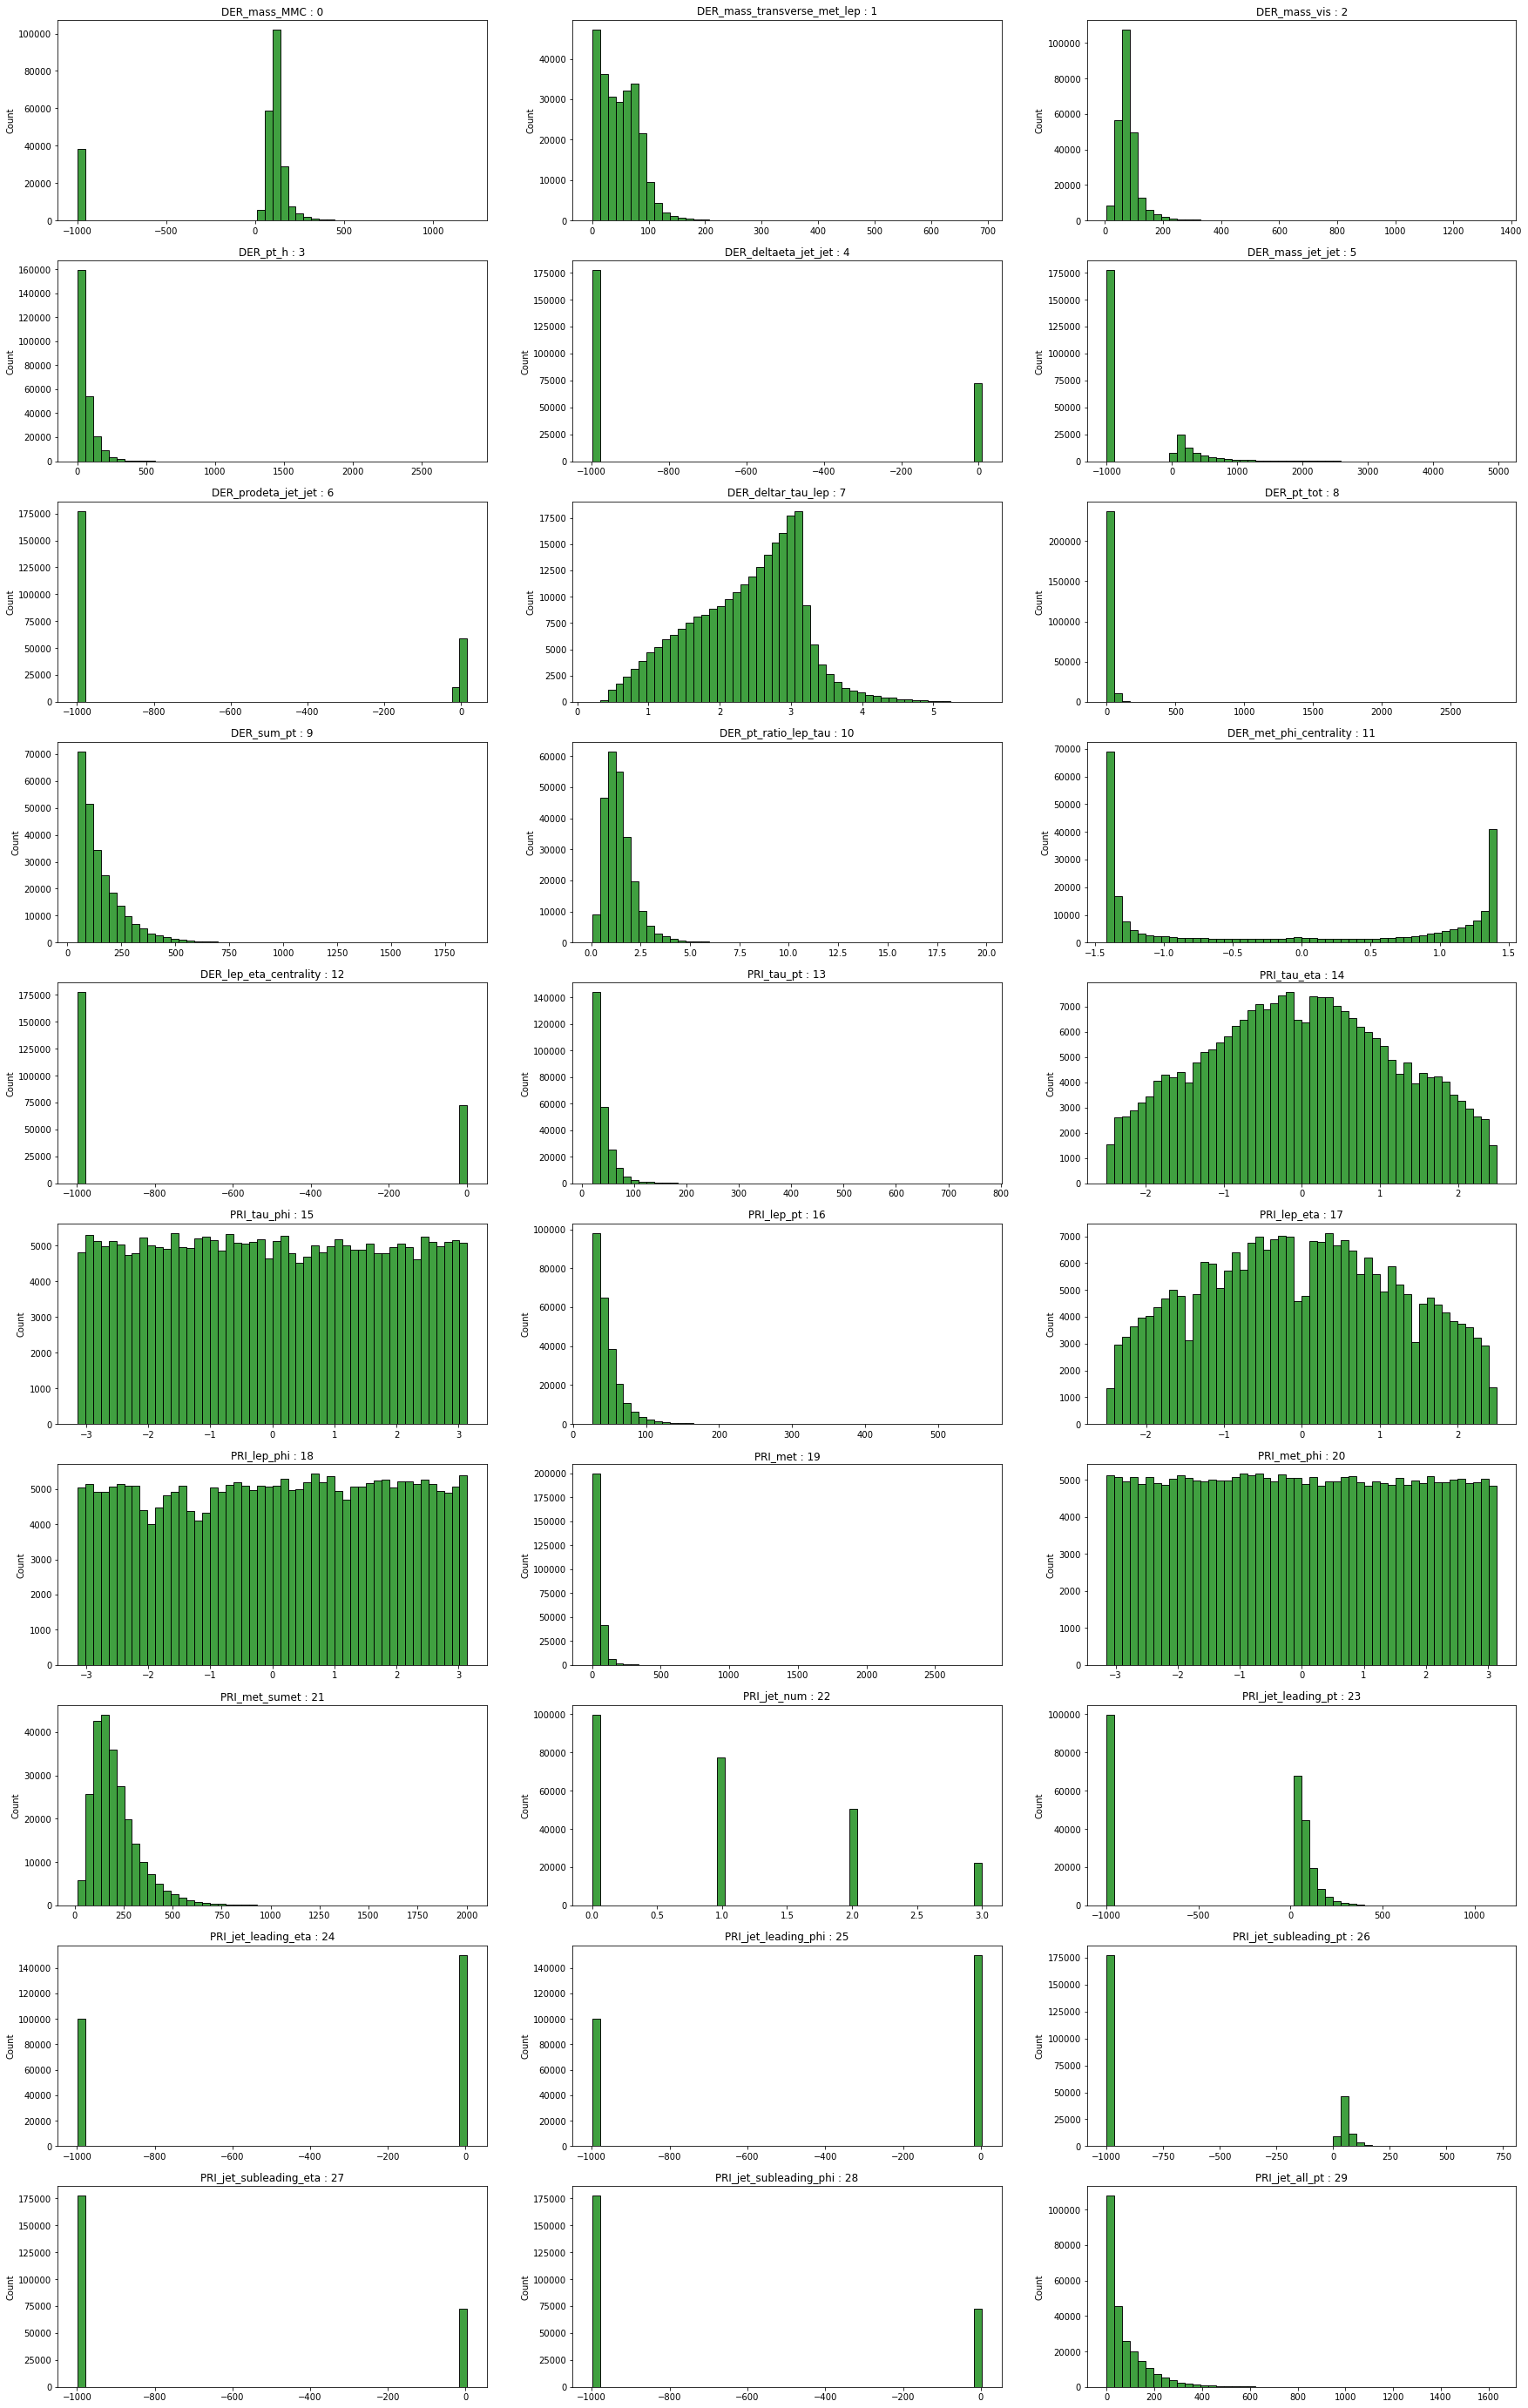

1

In [5]:
from function import *

names = ["DER_mass_MMC", "DER_mass_transverse_met_lep", "DER_mass_vis", "DER_pt_h", "DER_deltaeta_jet_jet", "DER_mass_jet_jet", "DER_prodeta_jet_jet", "DER_deltar_tau_lep", "DER_pt_tot", "DER_sum_pt", "DER_pt_ratio_lep_tau", "DER_met_phi_centrality", "DER_lep_eta_centrality", "PRI_tau_pt", "PRI_tau_eta", "PRI_tau_phi", "PRI_lep_pt", "PRI_lep_eta", "PRI_lep_phi", "PRI_met", "PRI_met_phi", "PRI_met_sumet", "PRI_jet_num", "PRI_jet_leading_pt", "PRI_jet_leading_eta", "PRI_jet_leading_phi", "PRI_jet_subleading_pt", "PRI_jet_subleading_eta", "PRI_jet_subleading_phi", "PRI_jet_all_pt"]

plot_features(x_tr, names)

In [ ]:
for i in range(len(names)):
    plt.hist(x_tr[:,i], 50, alpha=0.75, label = names[i])
    plt.legend(fontsize=5)

# See difference

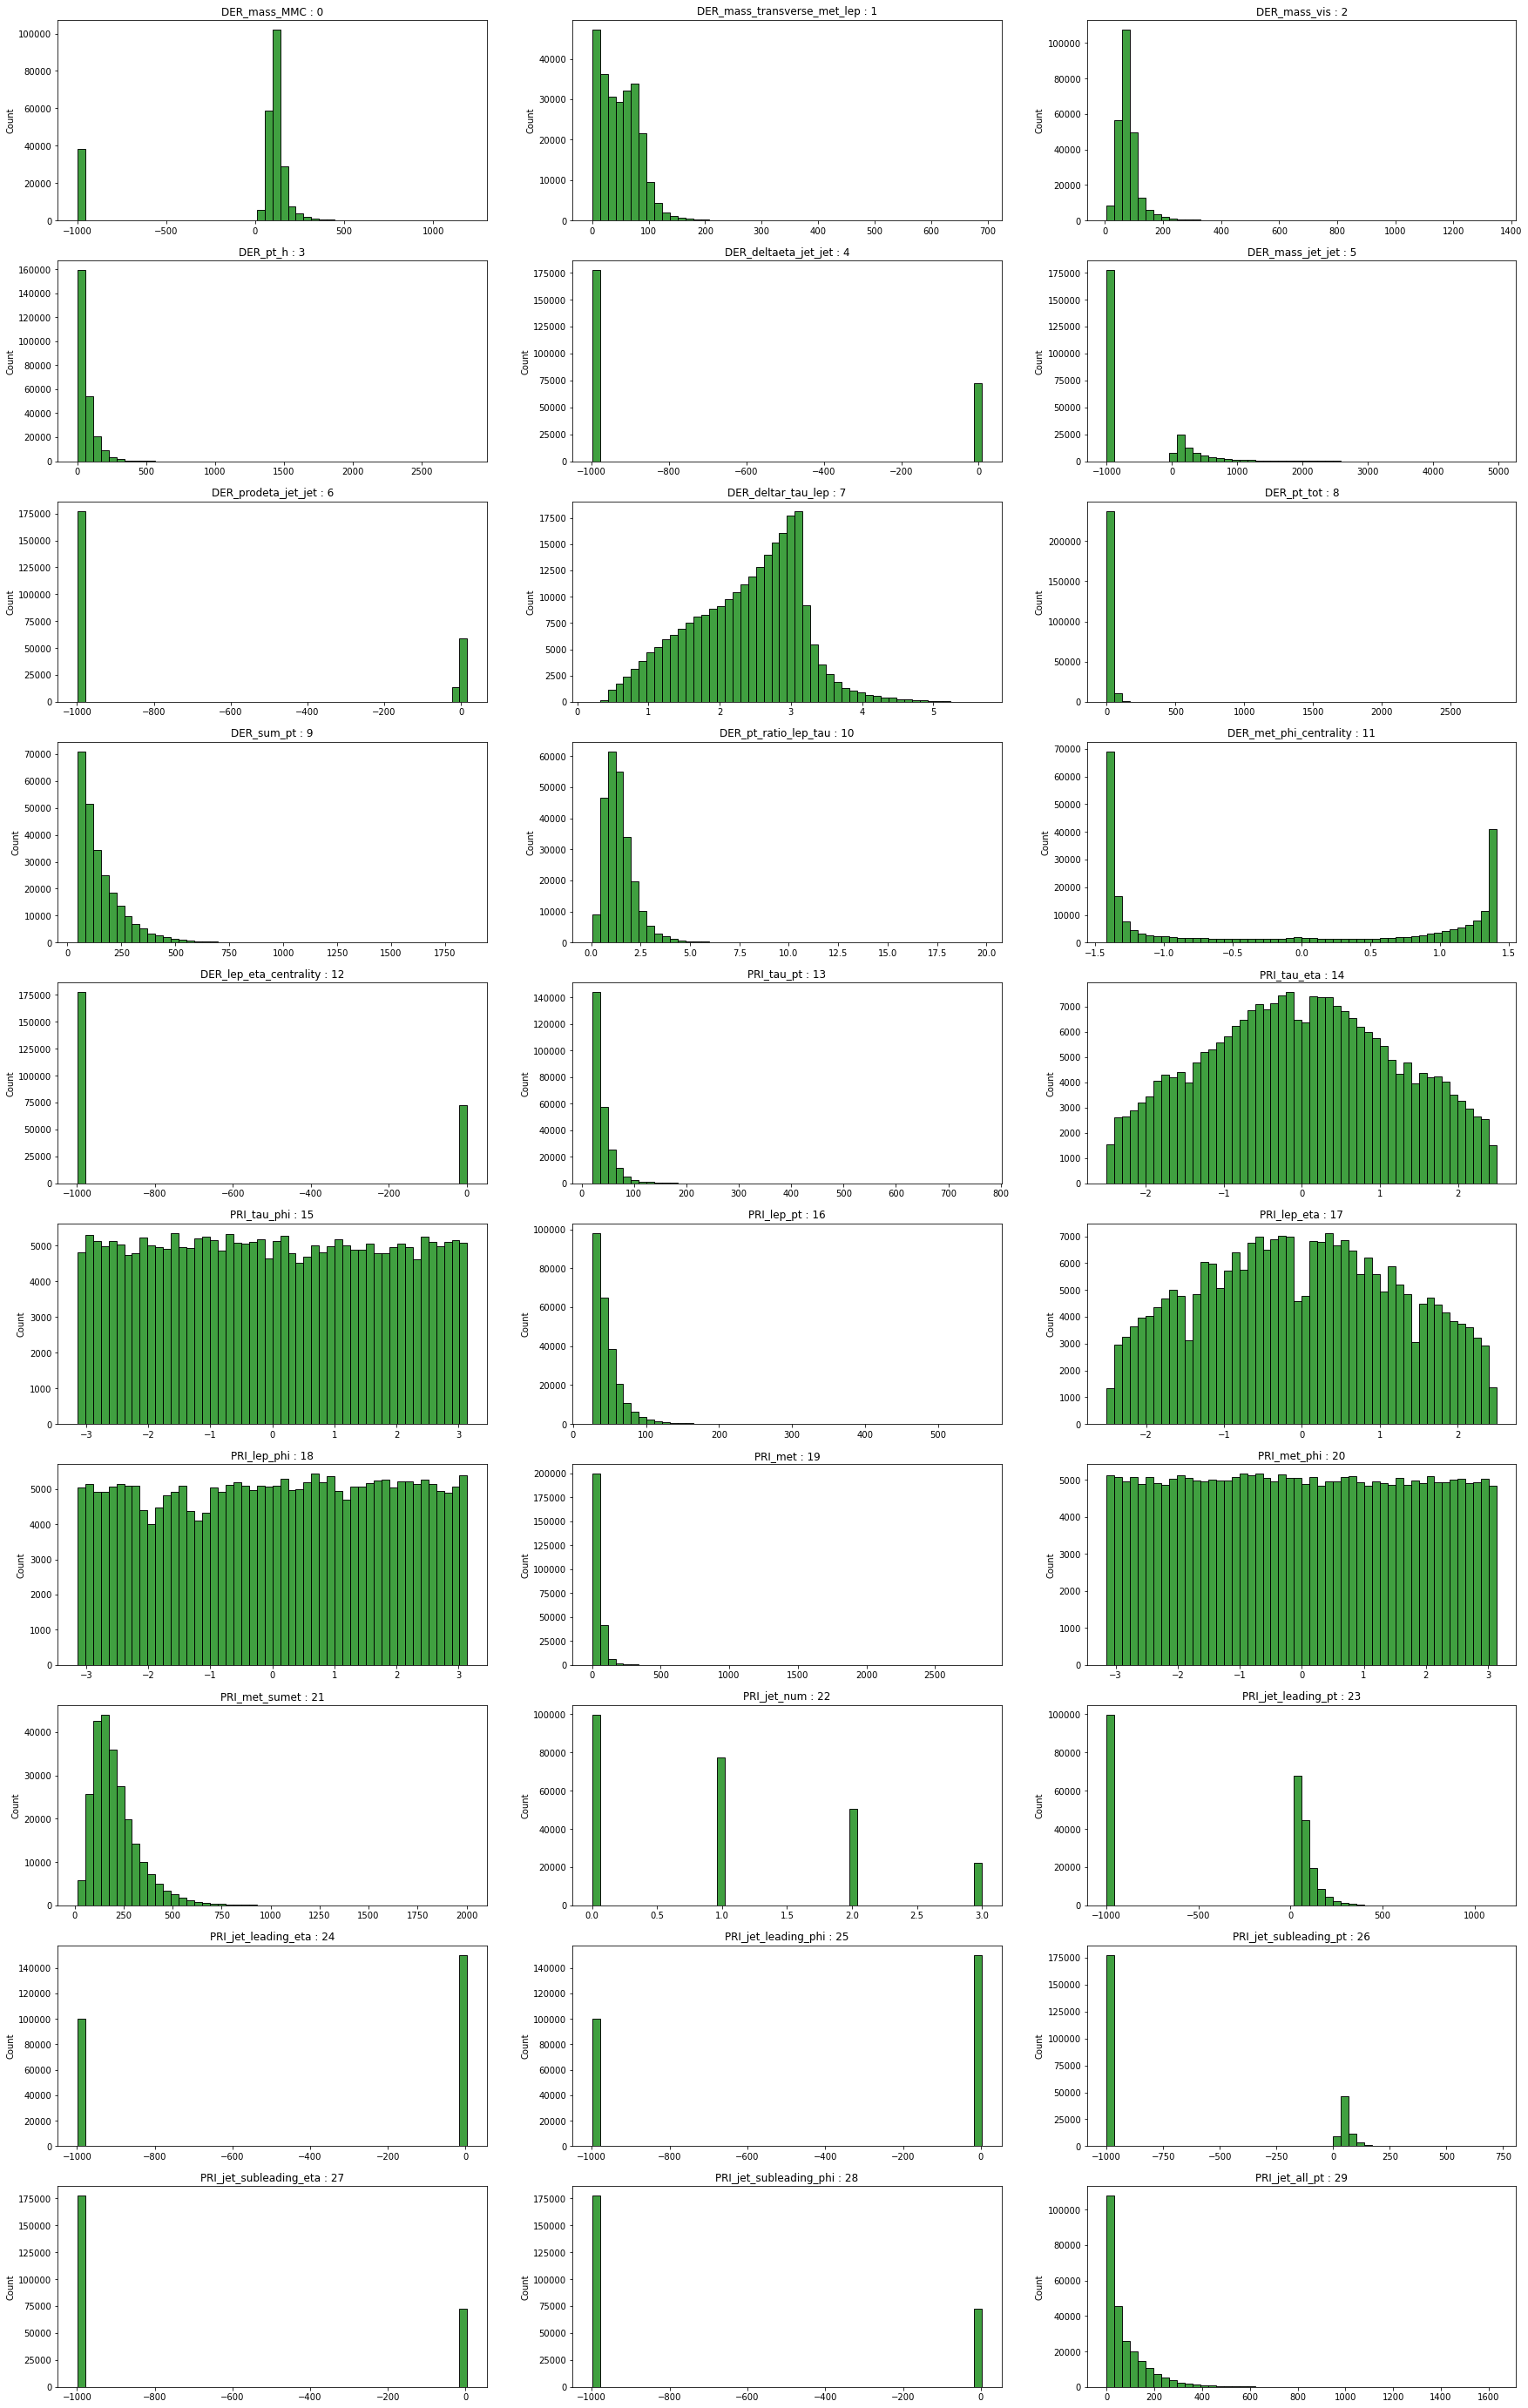

1

In [6]:
plot_features(x_tr, names)

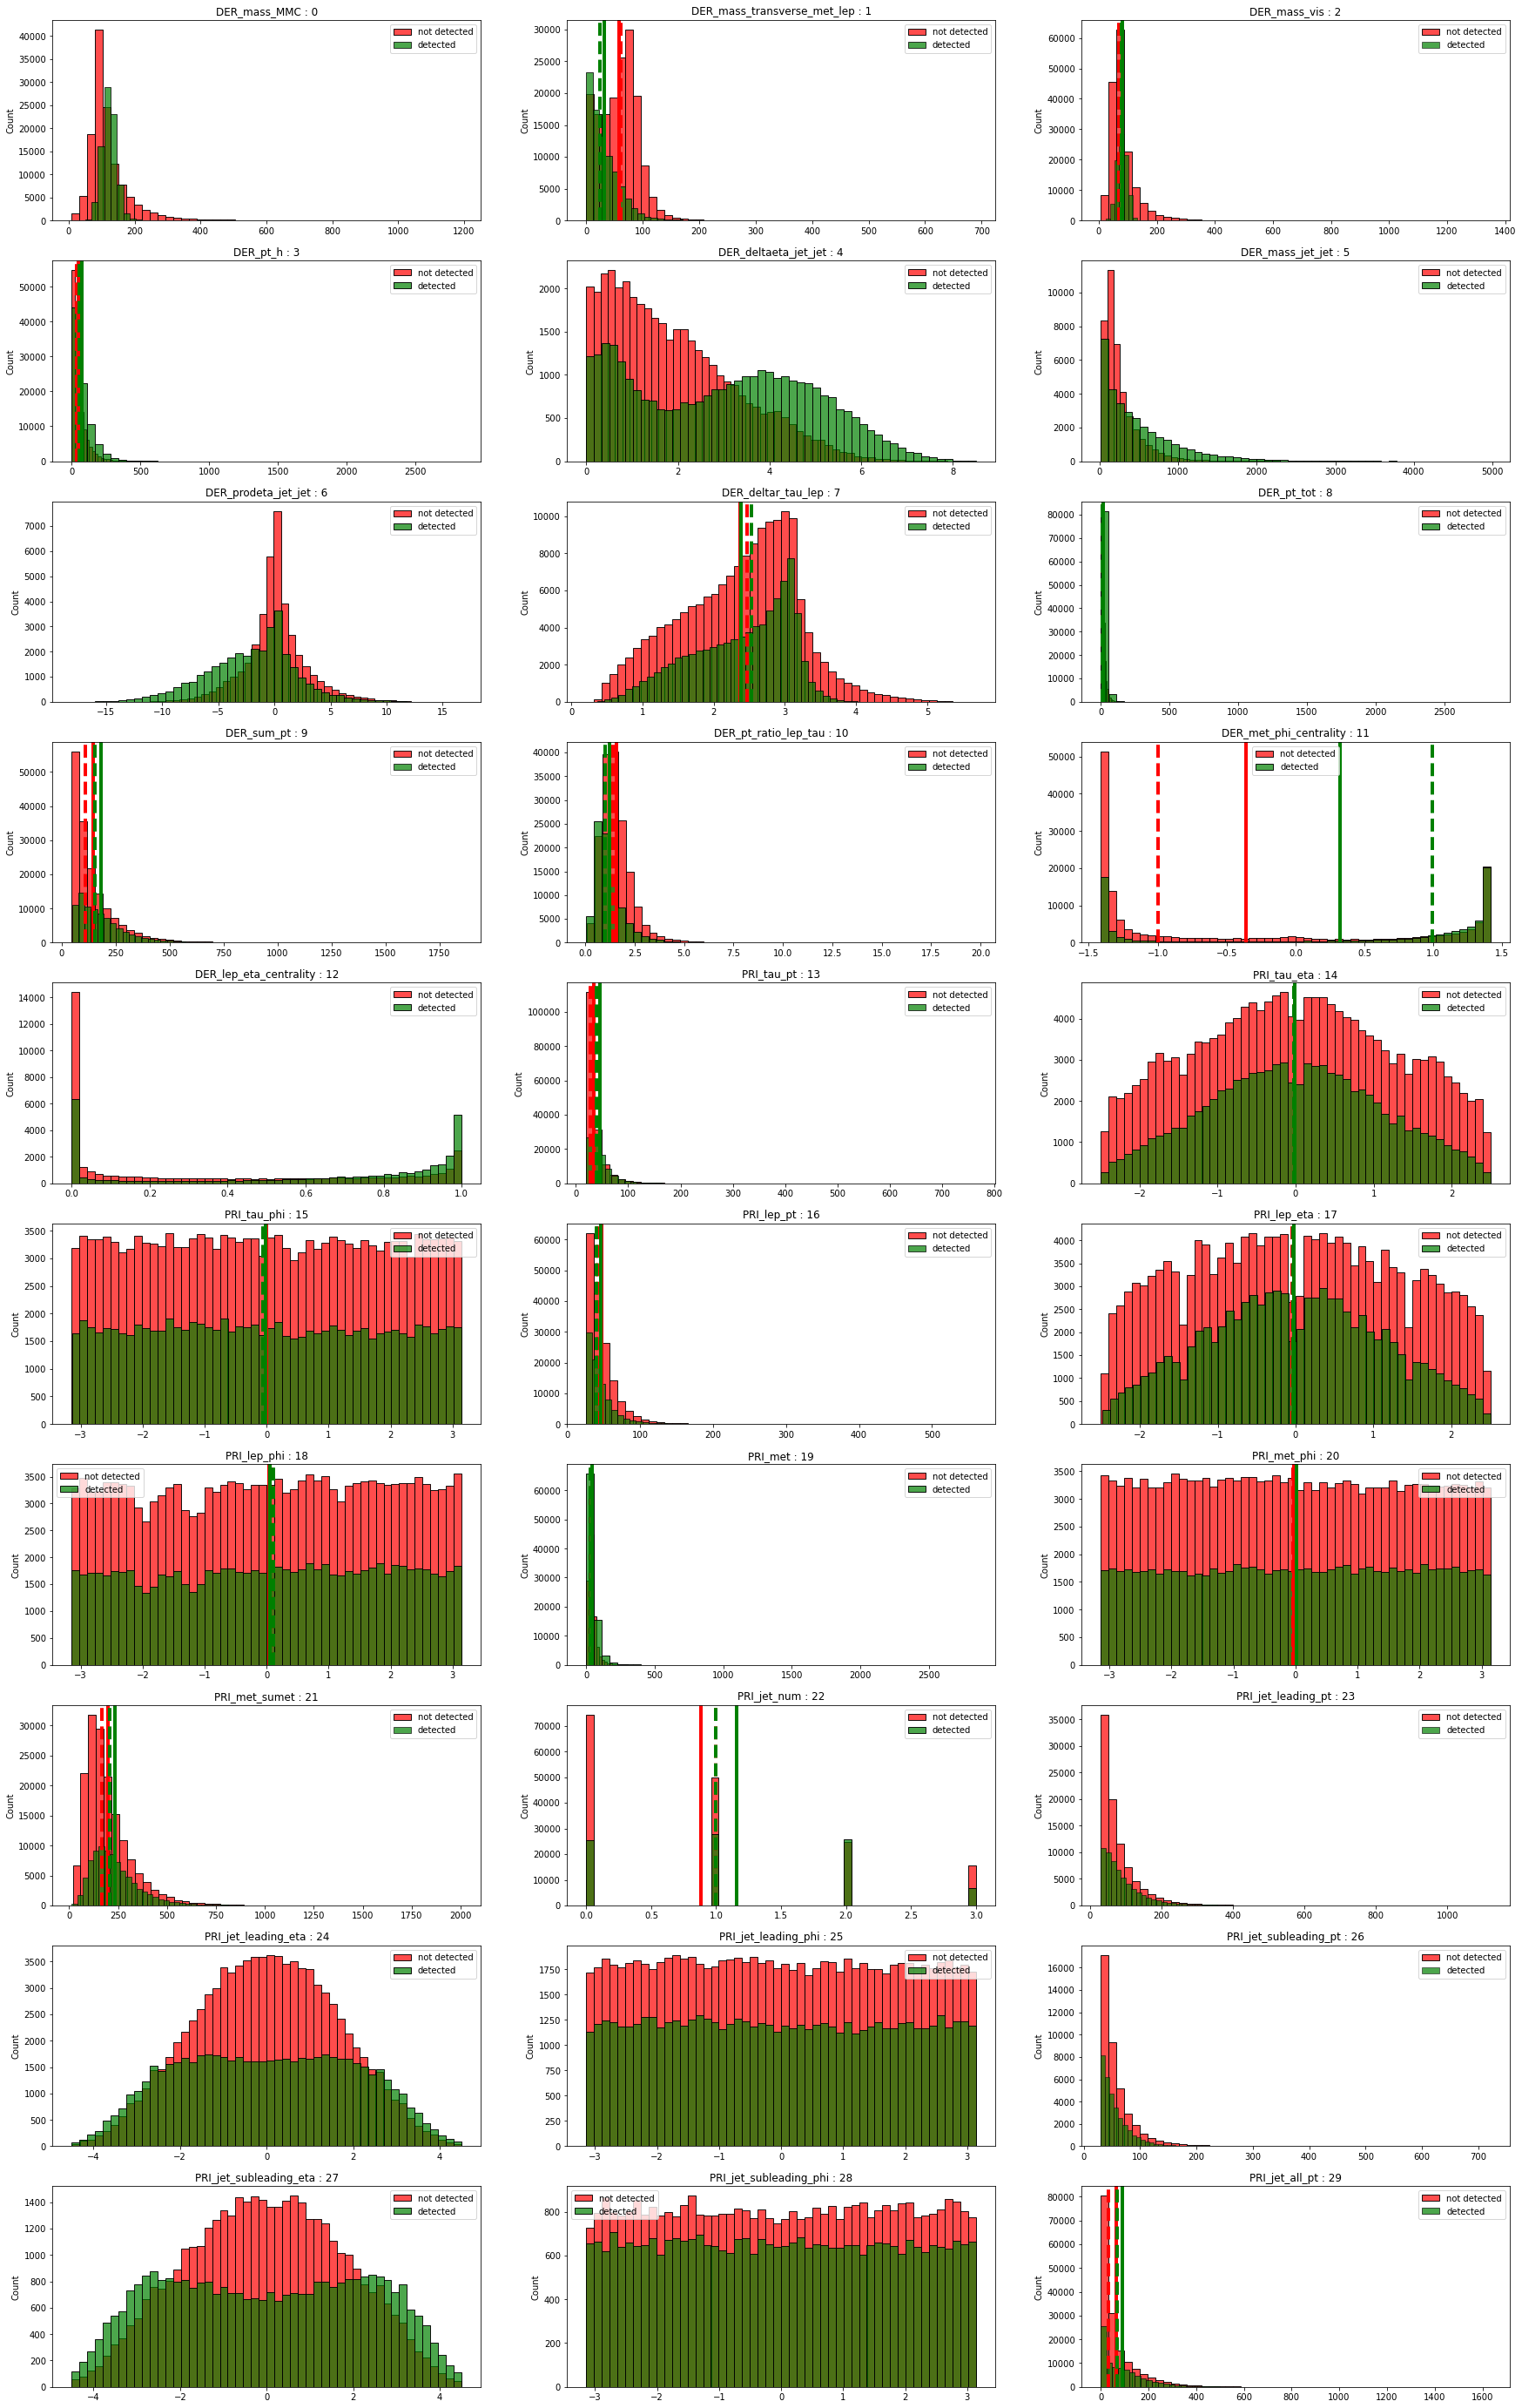

1

In [9]:
plot_detected_features(put_nan(x_tr), y_tr, names)

# Remove features with too many missing values

In [12]:
names = np.array(['DER_mass_MMC','DER_mass_transverse_met_lep','DER_mass_vis','DER_pt_h','DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet','DER_deltar_tau_lep','DER_pt_tot','DER_sum_pt','DER_pt_ratio_lep_tau','DER_met_phi_centrality','DER_lep_eta_centrality','PRI_tau_pt','PRI_tau_eta','PRI_tau_phi','PRI_lep_pt','PRI_lep_eta','PRI_lep_phi','PRI_met','PRI_met_phi','PRI_met_sumet','PRI_jet_num','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi','PRI_jet_all_pt'])

threshold = 0.7
x_nan = put_nan(x_tr)
prop_nan, ind = proportions_nan(x_nan, threshold)
print ("Features which have more than ", threshold*100, "% of NAN values are ", ind) 

Features which have more than  70.0 % of NAN values are  [ 4  5  6 12 26 27 28]


We can remove now features with more than 30% of missing values.

In [ ]:
x_tr_prop_nan = np.delete(x_tr_reg, ind, axis=1)
print(x_tr_prop_nan.shape)

# Standardize data

We need to replace the missing data with smart values

### 1. Separate class and reg data 

In [446]:
x_tr_class = x_tr[:, 22]
#remove the column 22 with discrete values, and columns with too many missing values.
np.append(ind, 22)
x_tr_reg = np.delete(x_tr, 22, axis=1)

x_te_class = x_te[:, 22]
x_te_reg = np.delete(x_te, 22, axis=1)

### 2. Replace missing values by median 

In [447]:
from function import *
# Not standardize but value of nan replace 
x_tr_reg = replace_nan_by_median(x_tr_reg)
x_te_reg = replace_nan_by_median(x_te_reg)

### 3. Split the data according to PRI_jet_num

In [448]:
#split the data according to PRI_jet_num
x_tr_split = np.array([x_tr_reg[np.where(x_tr_class==0)], x_tr_reg[np.where(x_tr_class==1)], 
                       x_tr_reg[np.where(x_tr_class==2)], x_tr_reg[np.where(x_tr_class==3)]], dtype=object)

y_tr_split = np.array([y_tr[np.where(x_tr_class==0)], y_tr[np.where(x_tr_class==1)], 
                       y_tr[np.where(x_tr_class==2)], y_tr[np.where(x_tr_class==3)]], dtype=object)

x_te_split = np.array([x_te_reg[np.where(x_te_class==0)], x_te_reg[np.where(x_te_class==1)], 
                       x_te_reg[np.where(x_te_class==2)], x_te_reg[np.where(x_te_class==3)]], dtype=object)

y_te_split = np.array([y_te[np.where(x_te_class==0)], y_te[np.where(x_te_class==1)], 
                       y_te[np.where(x_te_class==2)], y_te[np.where(x_te_class==3)]], dtype=object)


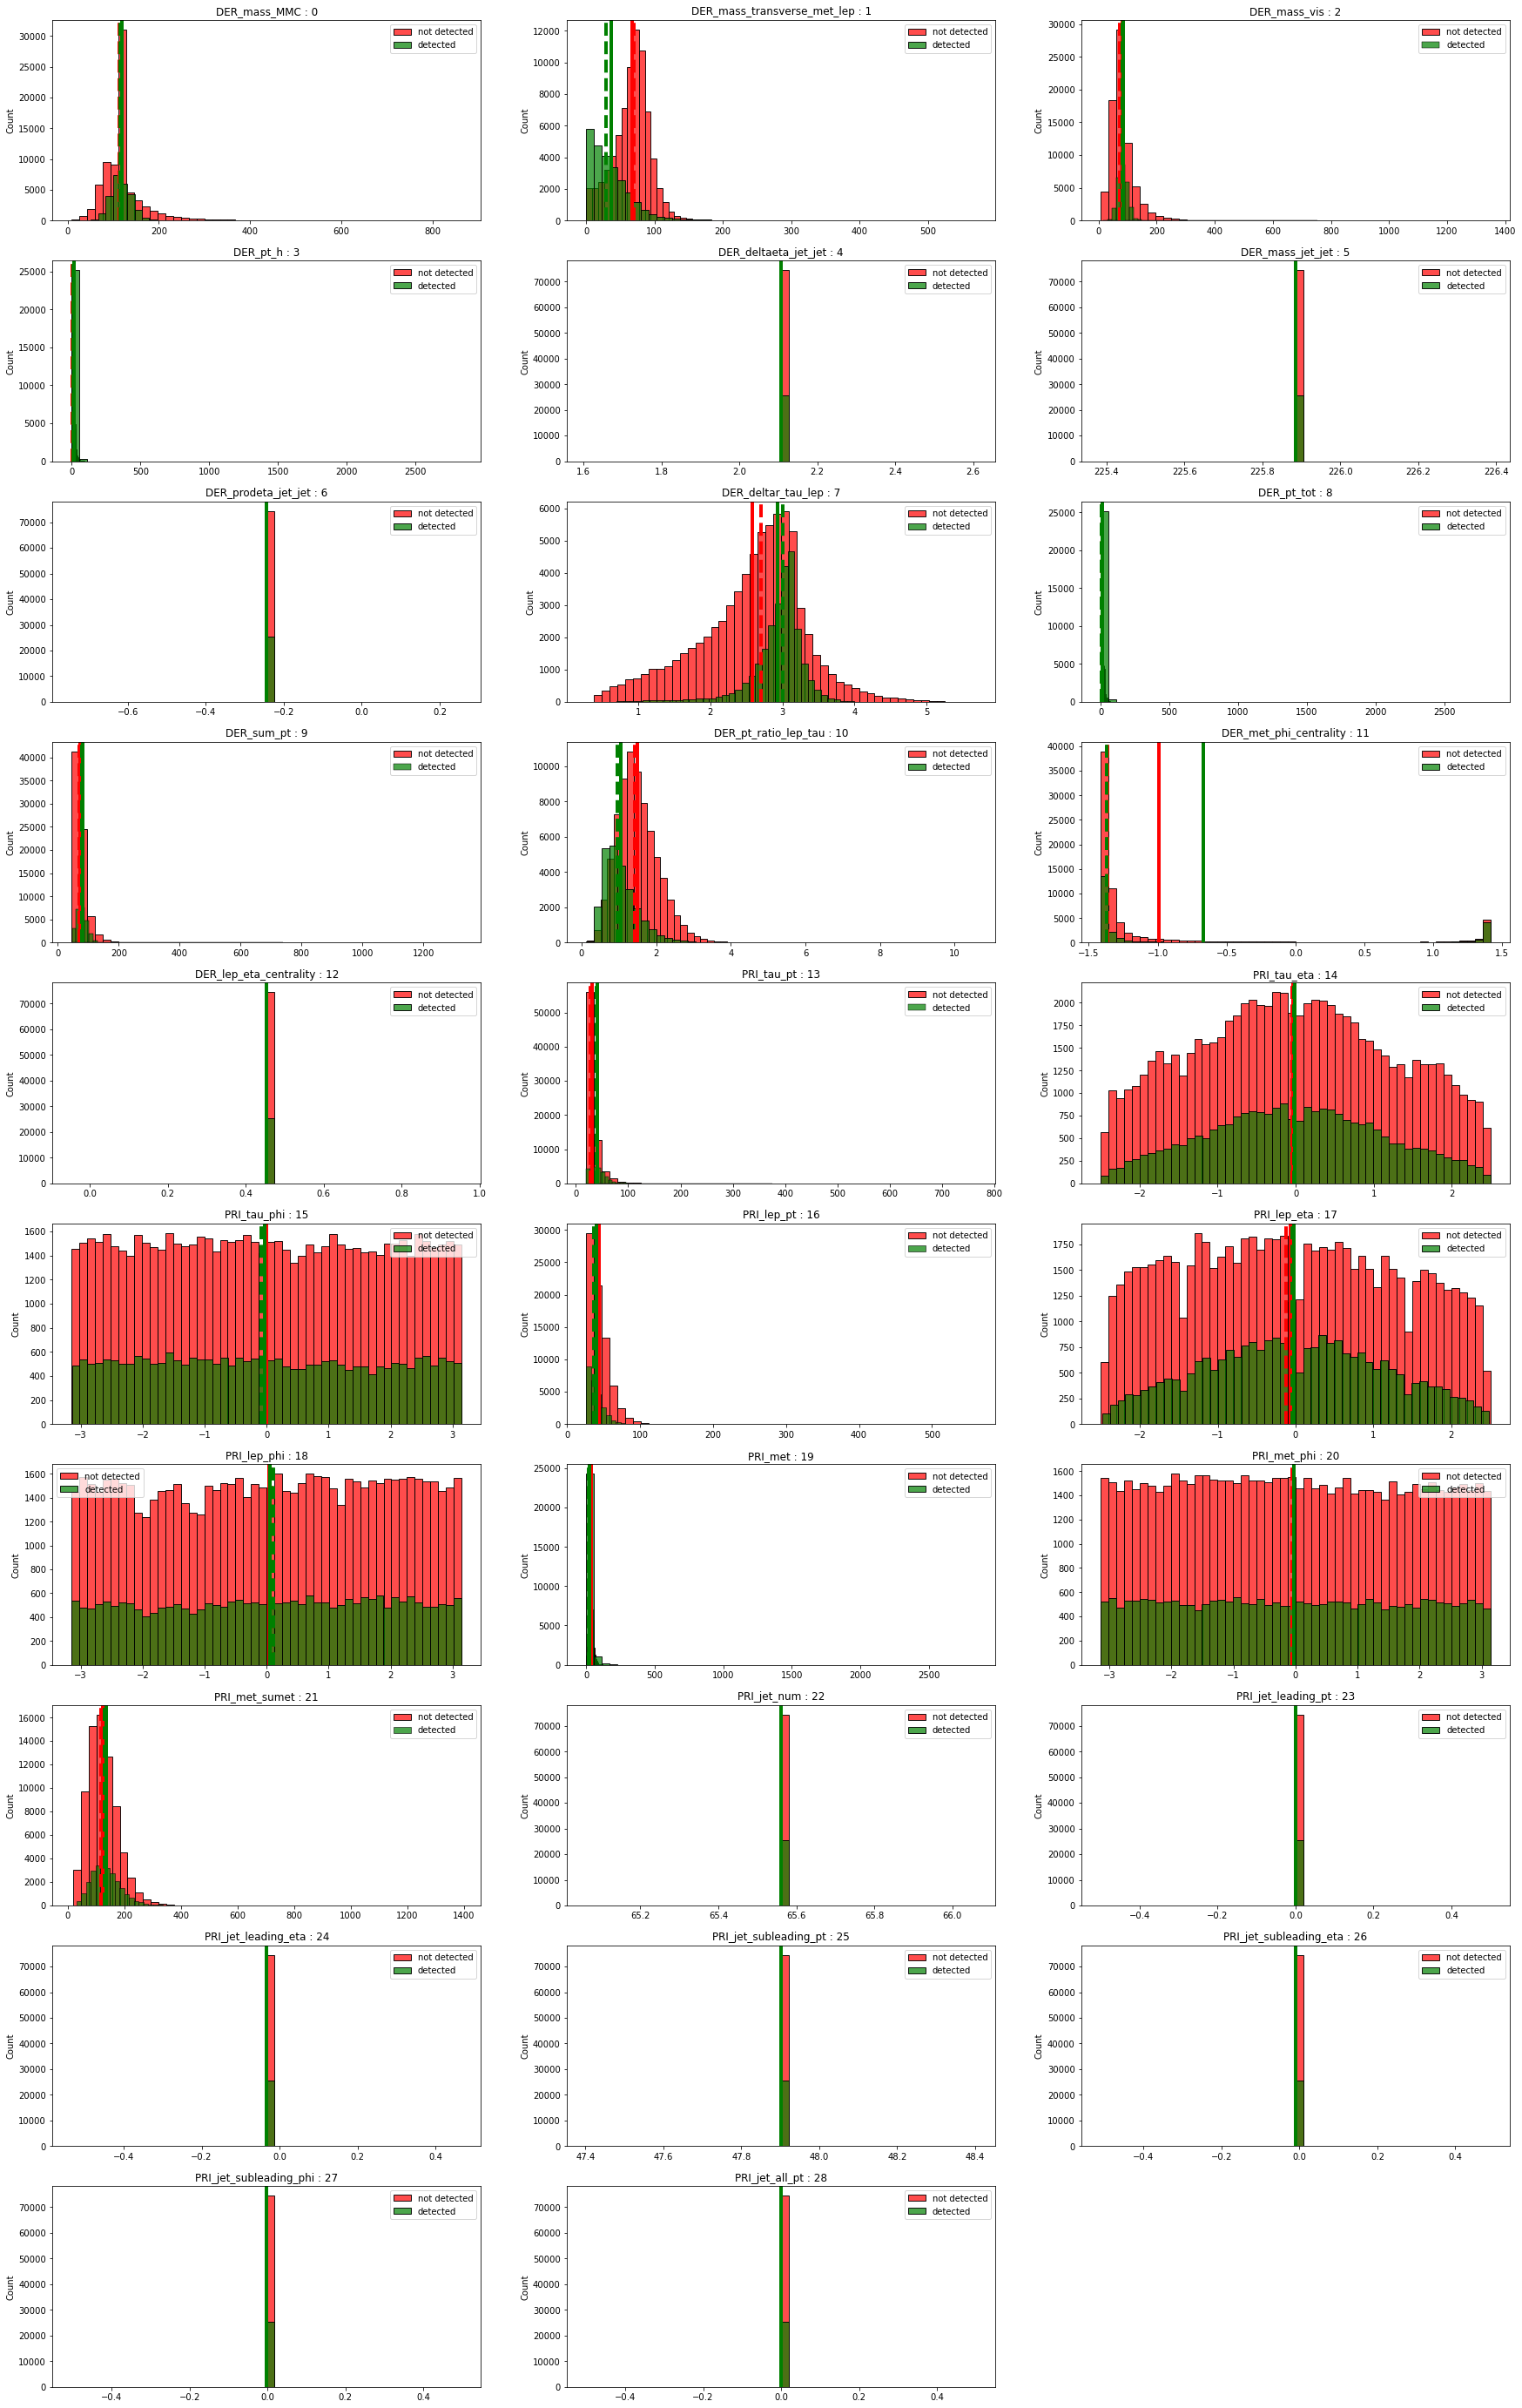

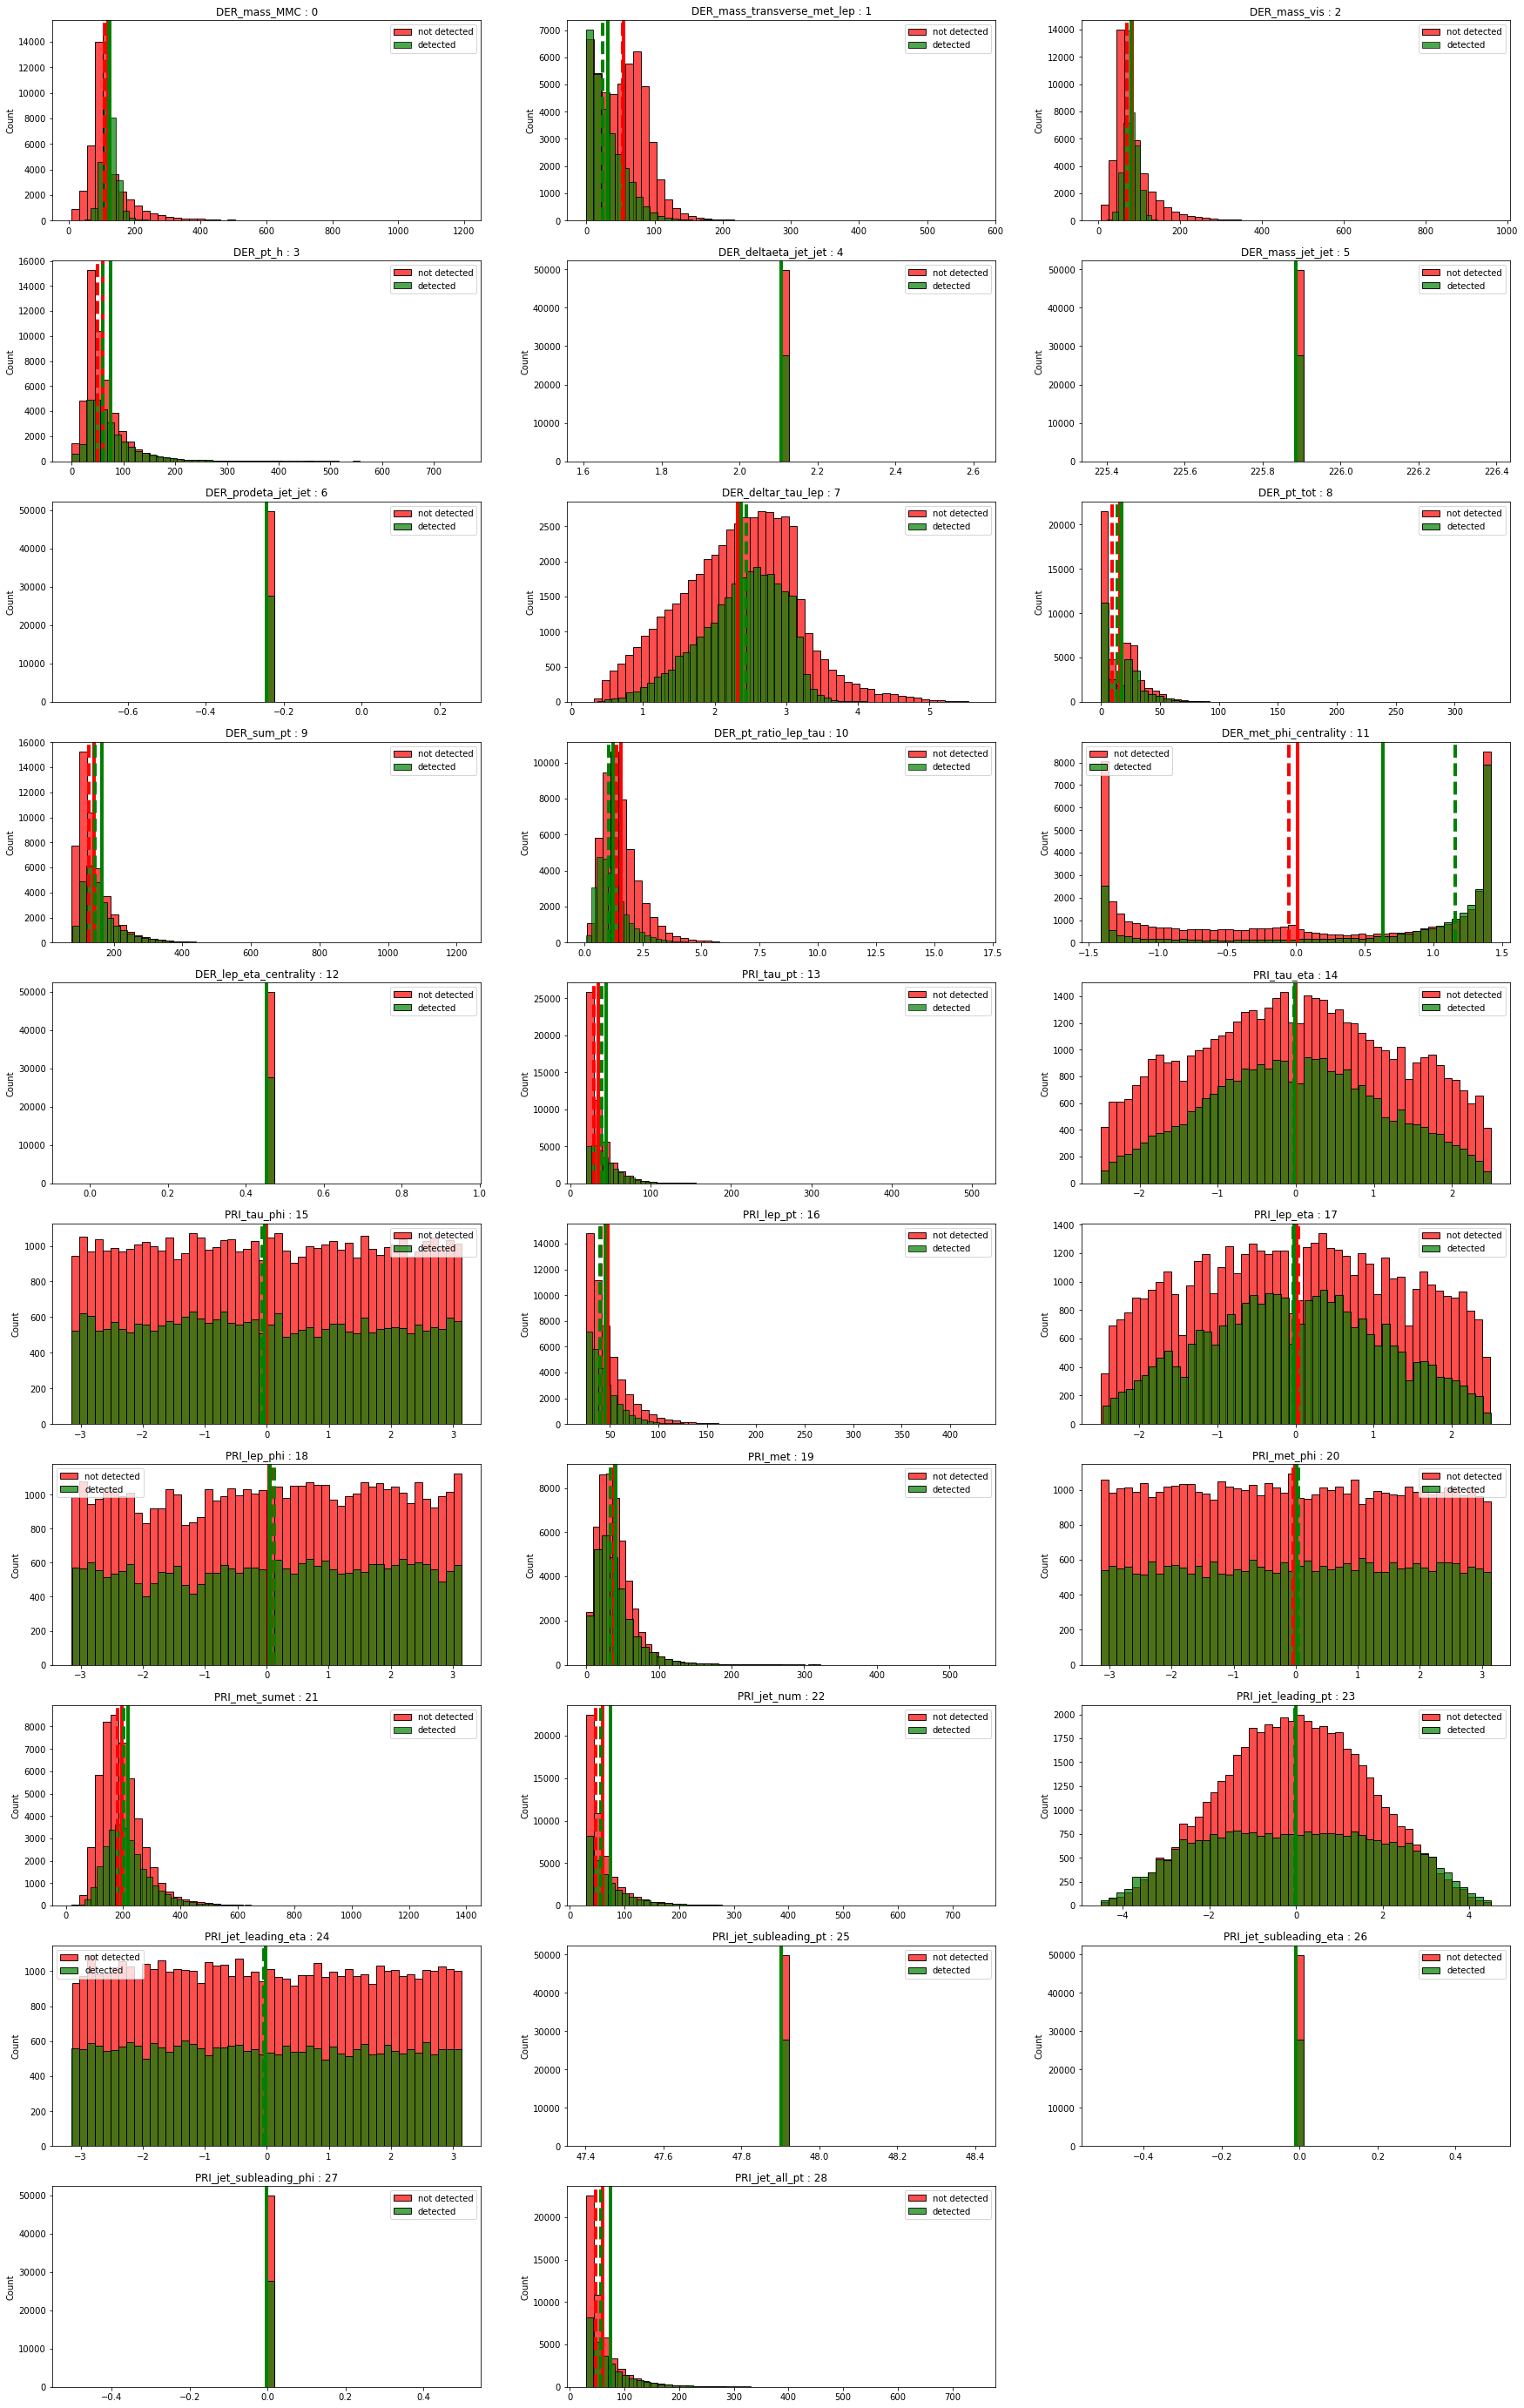

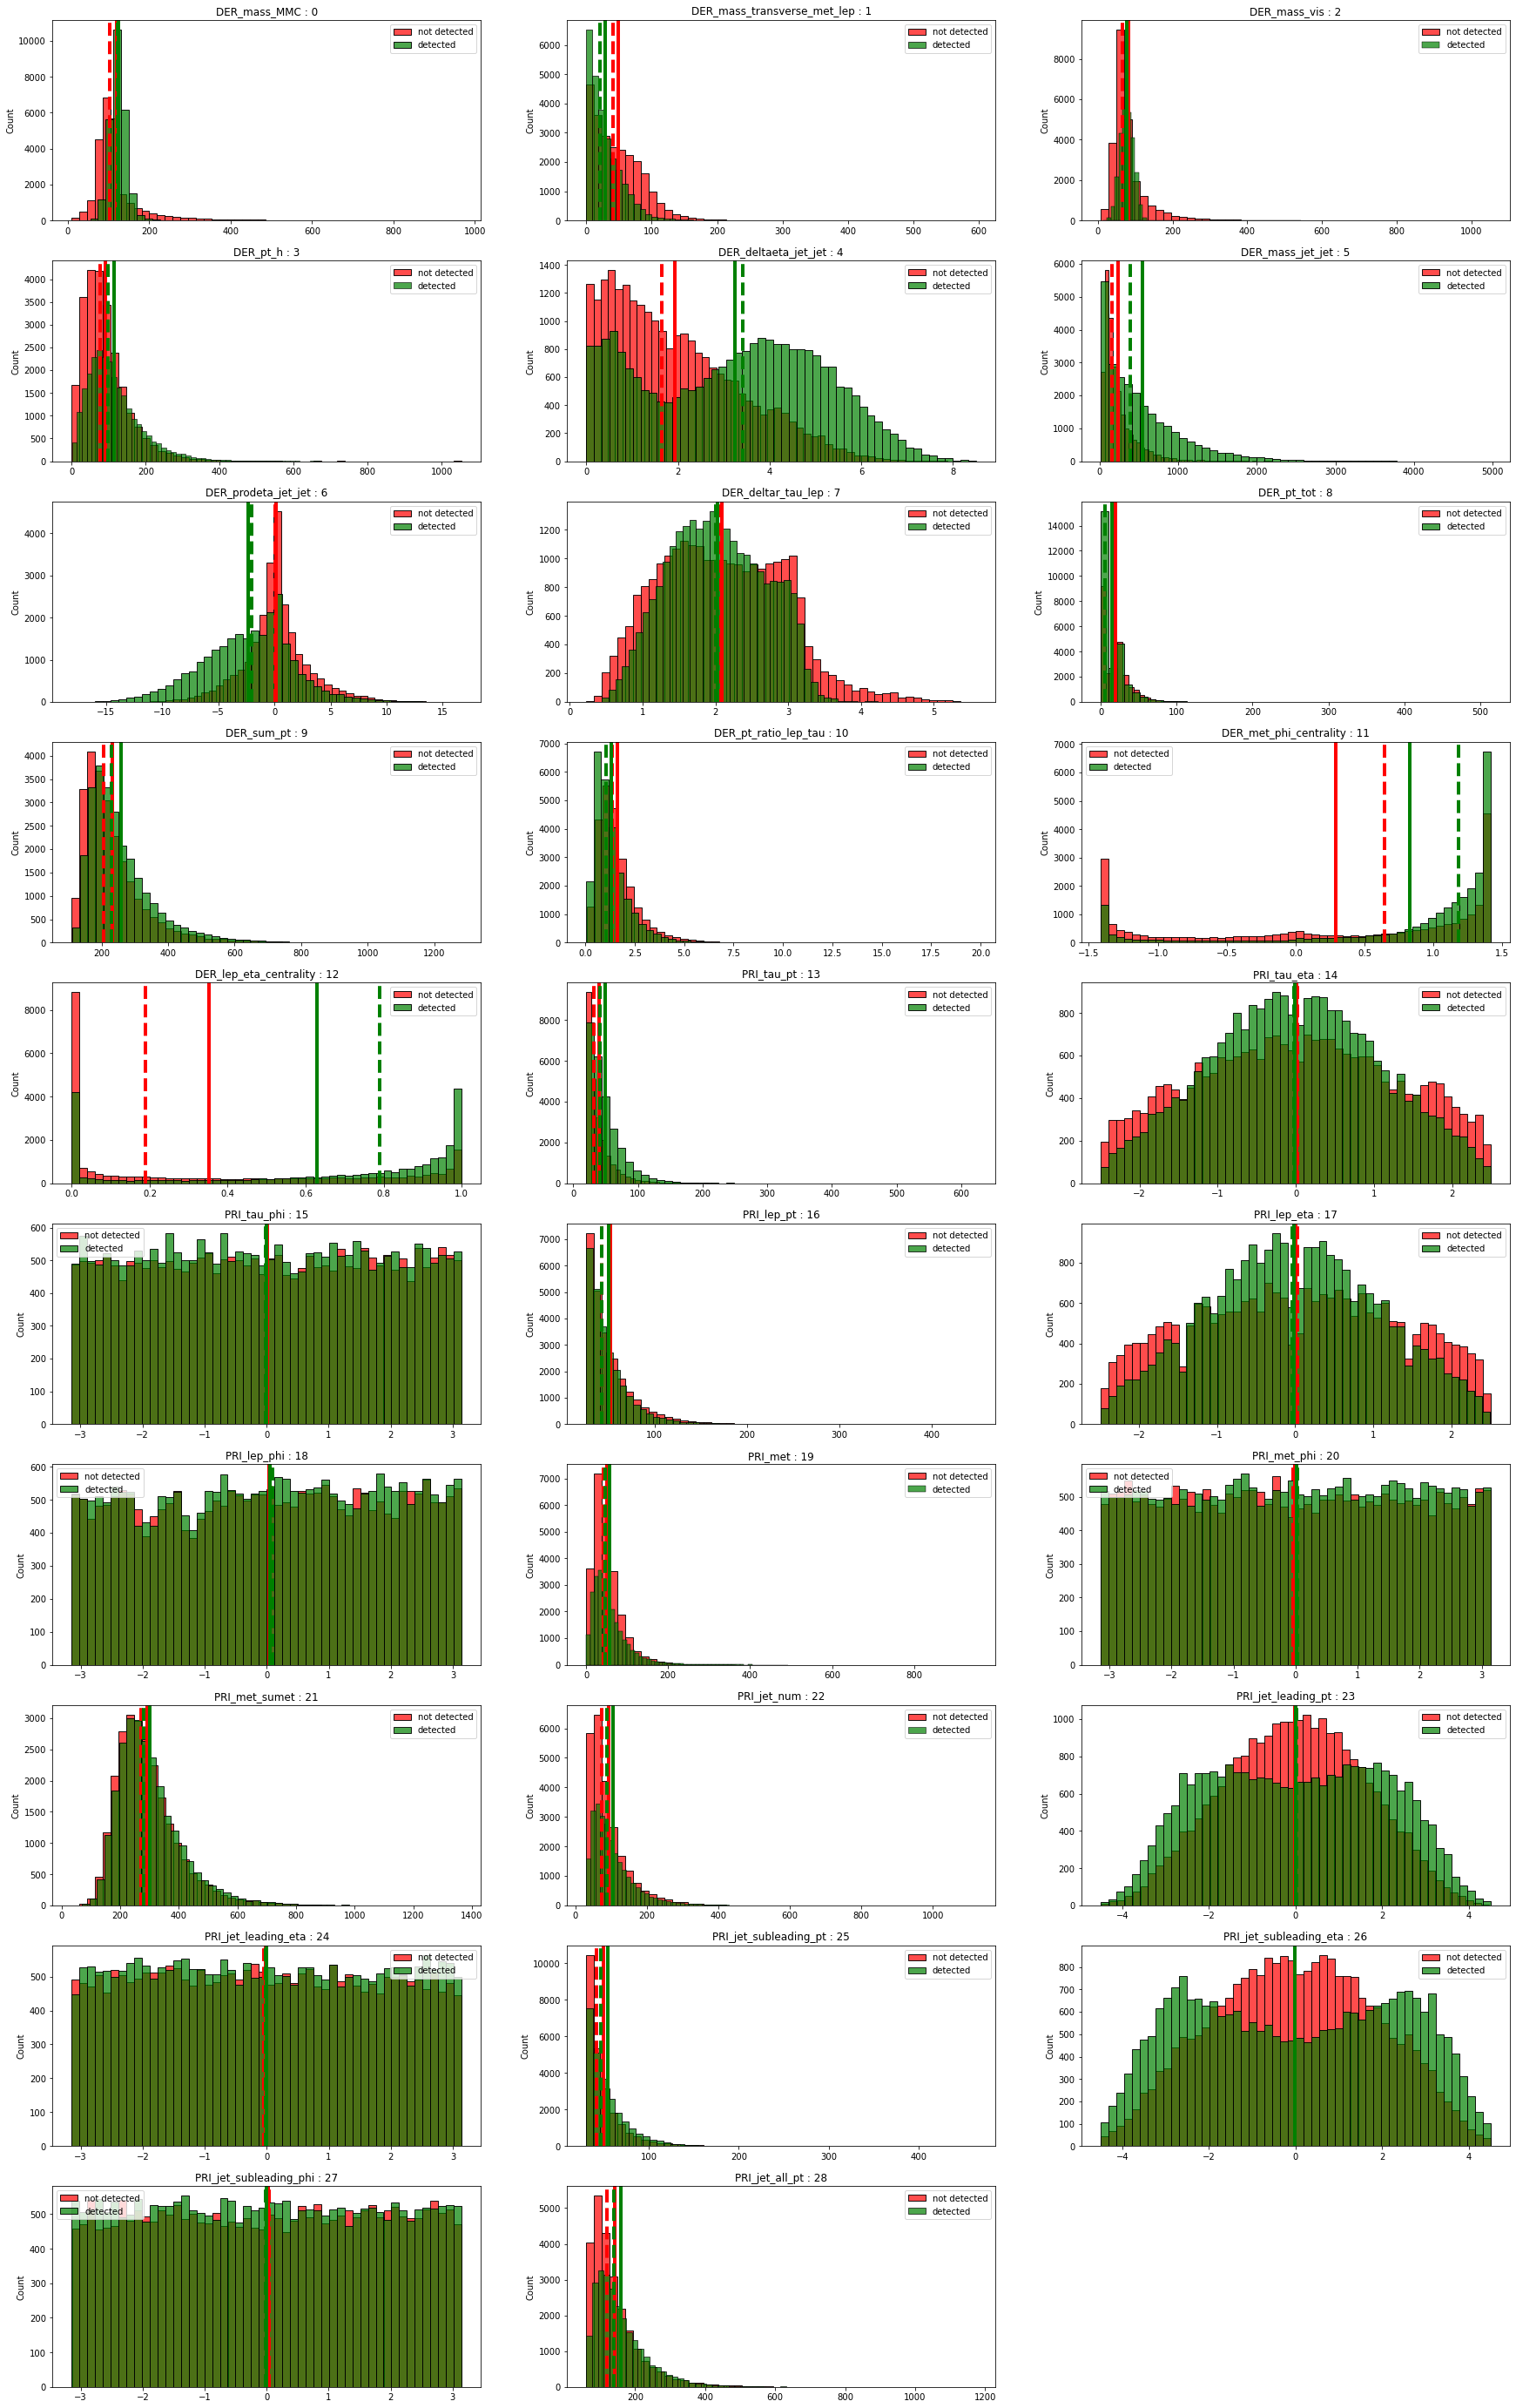

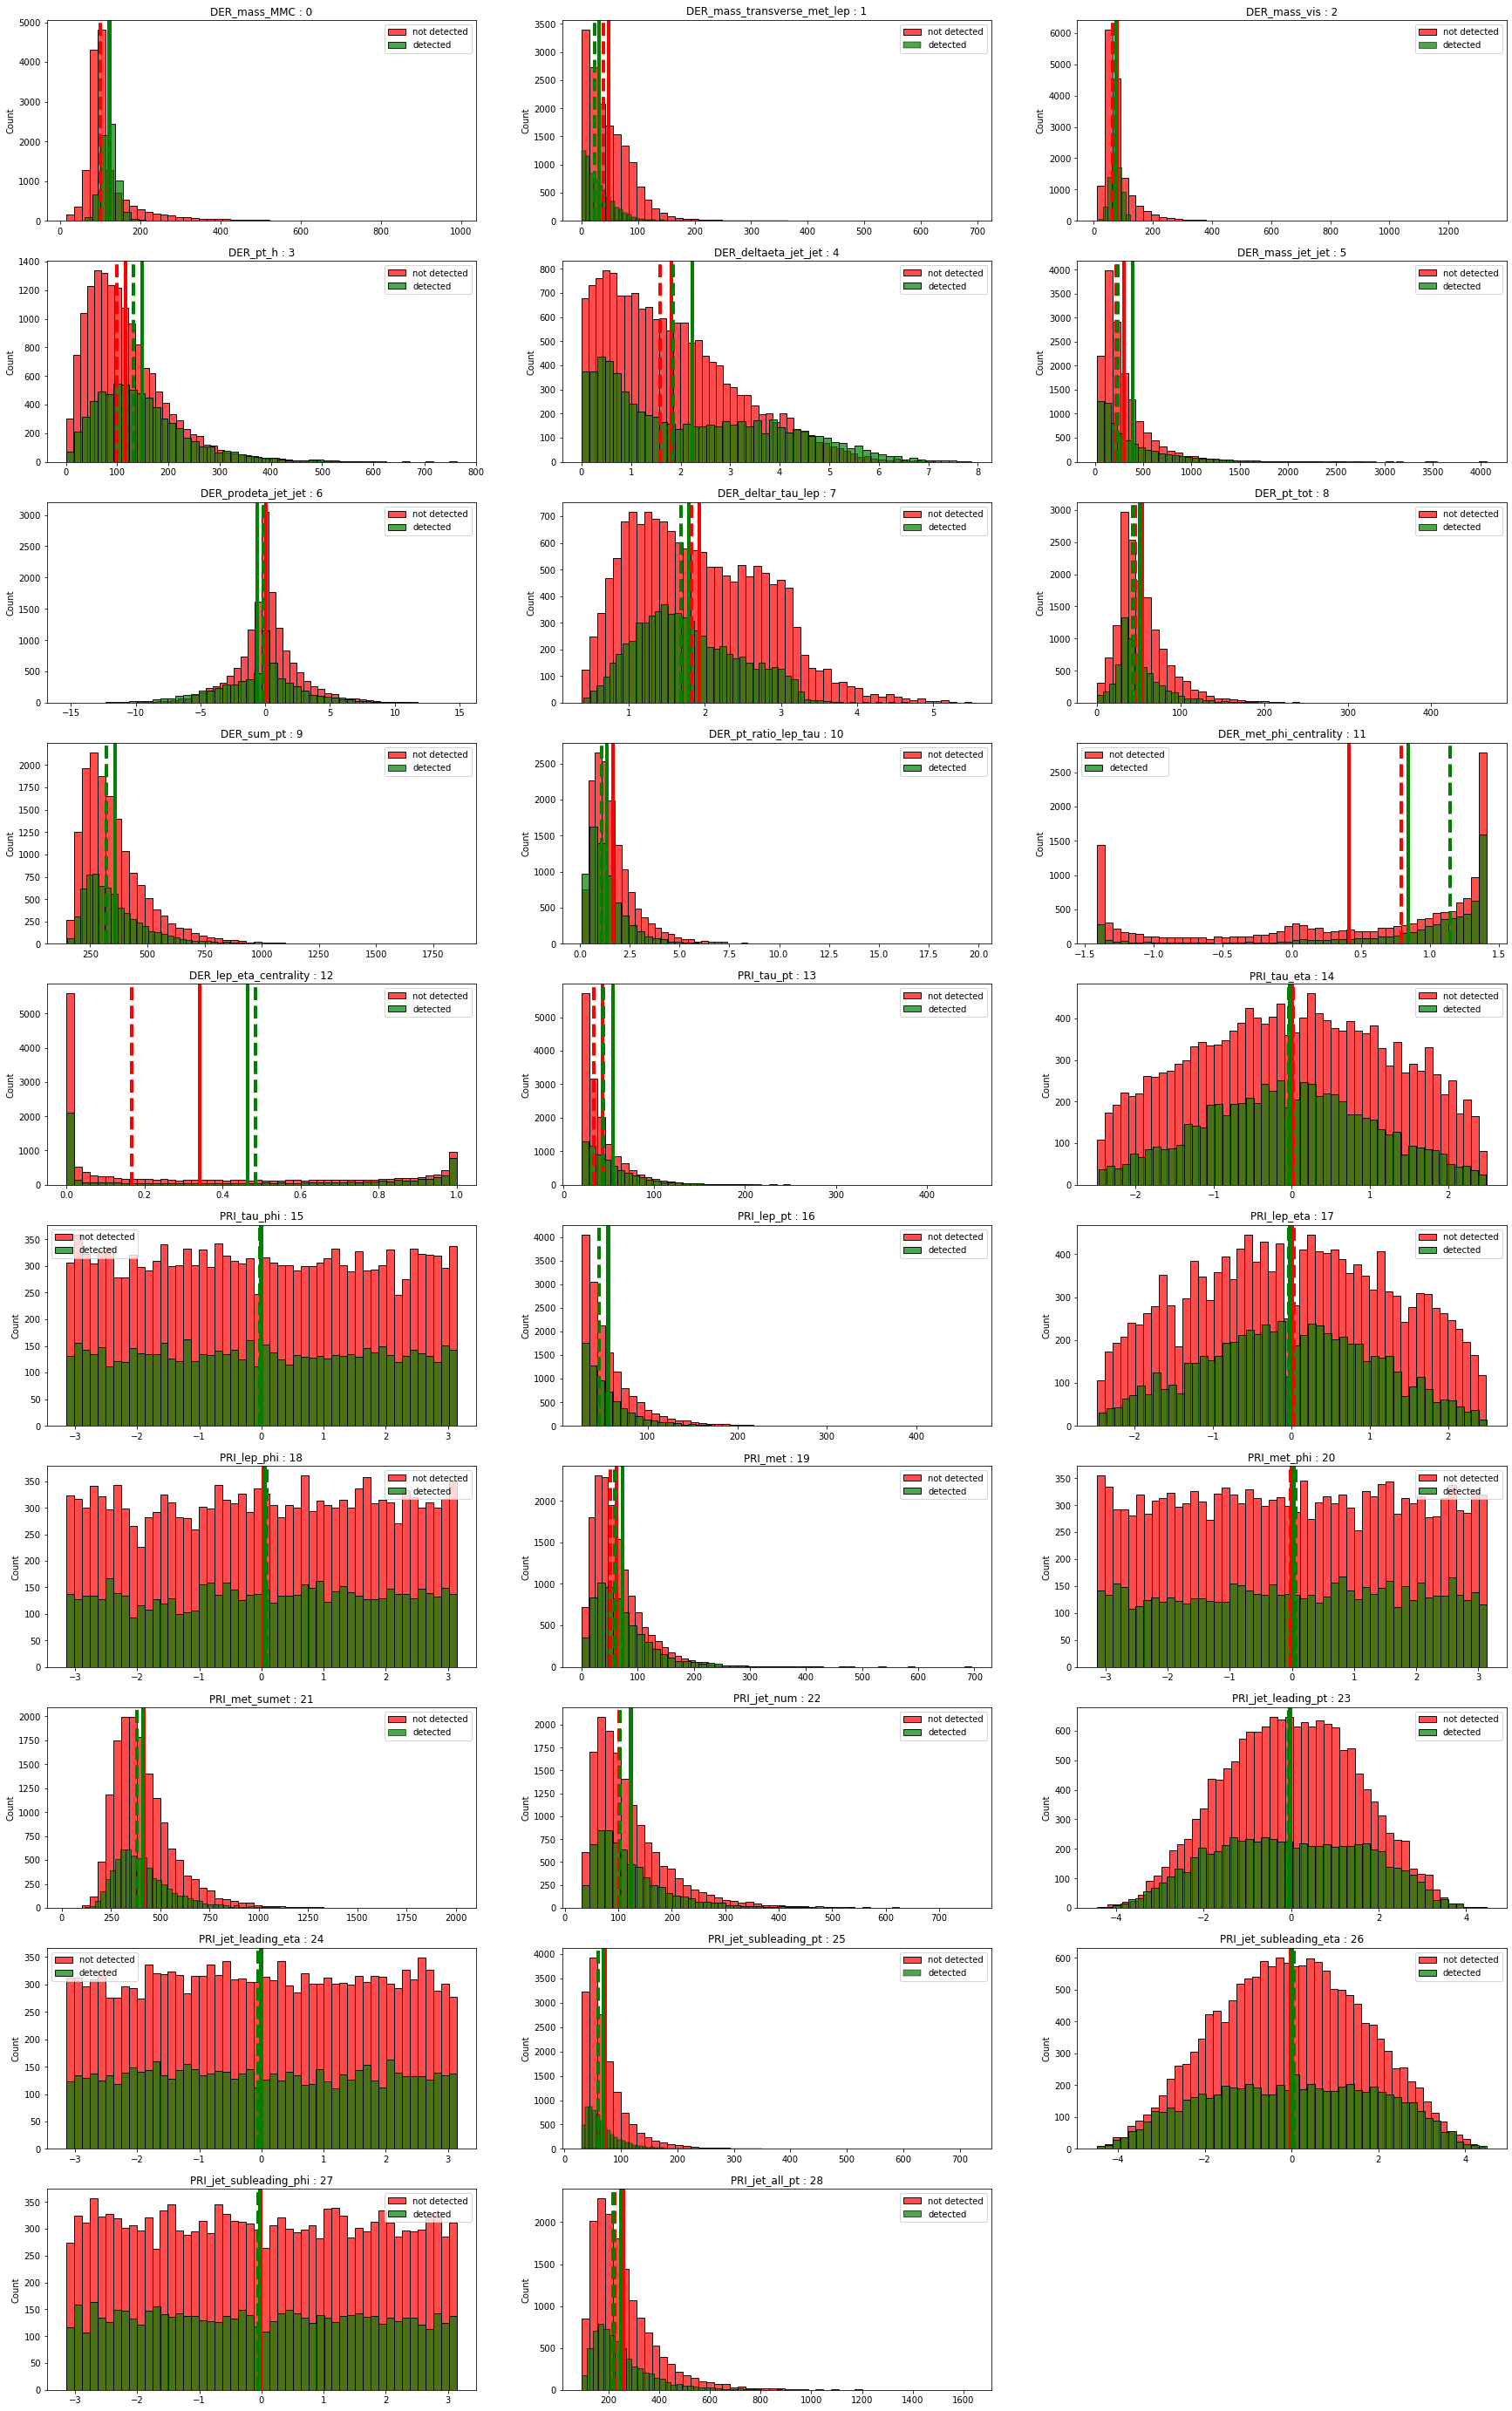

In [463]:
for i in range(len(x_tr_split)):
    plot_detected_features(x_tr_split[i], y_tr_split[i], names)

- For the split 0 we observe : columns 4, 5, 6, 8, 12 and 22 to 28 are useless.  
- For the split 1 we observe : columns 4, 5, 12 and 25 to 27 are useless.  
- For the split 2 and 3 we can keep all the data.  


### 4. Remove useless data

In [450]:
x_tr_del = [np.delete(x_tr_split[0], [4, 5, 6, 8, 12, 22, 23, 24, 25, 26, 27, 28], axis=1),
            np.delete(x_tr_split[1], [4, 5, 12, 25, 26, 27], axis=1), 
            x_tr_split[2], x_tr_split[3]]

In [451]:
x_te_del = [np.delete(x_te_split[0], [4, 5, 6, 8, 12, 22, 23, 24, 25, 26, 27, 28], axis=1),
            np.delete(x_te_split[1], [4, 5, 12, 25, 26, 27], axis=1), 
            x_te_split[2], x_te_split[3]]

In [458]:
x_tr_del[0].shape

(99913, 17)

### 5. Split train and test

In [227]:
y_tr.shape

(250000,)

In [452]:
ratio_test = 0.2
seed = 2

y_tr_tr_0, y_tr_te_0, x_tr_tr_0, x_tr_te_0 = train_test_split(y_tr_split[0], x_tr_del[0], ratio_test, seed)
y_tr_tr_1, y_tr_te_1, x_tr_tr_1, x_tr_te_1 = train_test_split(y_tr_split[1], x_tr_del[1], ratio_test, seed)
y_tr_tr_2, y_tr_te_2, x_tr_tr_2, x_tr_te_2 = train_test_split(y_tr_split[2], x_tr_del[2], ratio_test, seed)
y_tr_tr_3, y_tr_te_3, x_tr_tr_3, x_tr_te_3 = train_test_split(y_tr_split[3], x_tr_del[3], ratio_test, seed)

(99913,)
(77544,)
(50379,)
(22164,)


In [392]:
print(y_tr_tr.shape)
print(y_tr_te.shape)
print(x_tr_split.shape[0])

()
()
4


### 6.0 Feature Expension and standardization

In [453]:
x_tr_list=[x_tr_tr_0, x_tr_tr_1, x_tr_tr_2, x_tr_tr_3]
x_te_list=[x_tr_te_0, x_tr_te_1, x_tr_te_2, x_tr_te_3]
y_tr_list=[y_tr_tr_0, y_tr_tr_1, y_tr_tr_2, y_tr_tr_3]
y_te_list=[y_tr_te_0, y_tr_te_1, y_tr_te_2, y_tr_te_3]

In [460]:
from function import *

degree = 6

x_tr_tr_poly = []
x_tr_te_poly = []
for i in range(x_tr_split.shape[0]):
    x_tr_tr_poly.append(standardize(build_poly(x_tr_list[i], degree)))
    x_tr_te_poly.append(standardize(build_poly(x_te_list[i], degree)))
    #keep one's on the first column
    x_tr_tr_poly[i][:,0]=np.ones(x_tr_tr_poly[i][:,0].shape[0])
    x_tr_te_poly[i][:,0]=np.ones(x_tr_te_poly[i][:,0].shape[0])


In [461]:
print(x_tr_tr_poly[0].shape)

(79931, 86)


### 7.0 Manual cross-validation

In [462]:
# from gradient_descent import *

from datetime import datetime

# Define the parameters of the algorithm.
lambda_tab = [10**(-7), 0, 10**(-7), 0]

max_iters_tab = [3500, 3500, 3500, 3500]
gamma = 10**(-1) #learing rate

#w_tab=np.zeros((4, x_tr_tr_poly[0].shape[1]))
#losses_tab=np.array((0,4))
w_tab = []

for i in range(x_tr_split.shape[0]) :  
    print("DATA_SET : ", i)
    #w_init = params_history[-1][i]
    w_init = np.full(x_tr_tr_poly[i].shape[1], 0.1)
    w, losses = reg_logistic_regression(y_tr_list[i], x_tr_tr_poly[i], lambda_tab[i], w_init, max_iters_tab[i], gamma)
    w_tab.append(w)
    
    loss_tr = compute_loss(y_tr_list[i], x_tr_tr_poly[i], w, 'negative_log_likelihood')
    loss_te = compute_loss(y_te_list[i], x_tr_te_poly[i], w, 'negative_log_likelihood')

    print("loss_tr : ", loss_tr)
    print("loss_te : ", loss_te)
    

DATA_SET :  0
iteration :  0  , loss :  0.9609127823548939
iteration :  100  , loss :  0.42353356734794295
iteration :  200  , loss :  0.401247320655102
iteration :  300  , loss :  0.39296031265021497
iteration :  400  , loss :  0.3882835198119362
iteration :  500  , loss :  0.3850966508346676
iteration :  600  , loss :  0.3827588243345449
iteration :  700  , loss :  0.3809433409606353
iteration :  800  , loss :  0.3794926101328064
iteration :  900  , loss :  0.37830409564841466
iteration :  1000  , loss :  0.3773077342367275
iteration :  1100  , loss :  0.3764526409091785
iteration :  1200  , loss :  0.37571386210935287
iteration :  1300  , loss :  0.3750740220329396
iteration :  1400  , loss :  0.3745131064240952
iteration :  1500  , loss :  0.3740194518062269
iteration :  1600  , loss :  0.373576997176358
iteration :  1700  , loss :  0.3731622156619679
iteration :  1800  , loss :  0.37278255103528113
iteration :  1900  , loss :  0.3724389217835847
iteration :  2000  , loss :  0.3721

In [387]:
params_history = []
params_history.append(w_tab)
print(loss_tr)
print(loss_te)

0.5834145163504786
0.5926267482006019


After playing with different regularization terms and different learning rates, we observe the following : 

**With polynomial degree of 3 :**    

- data_set_0 : minimum loss test achievable is 0.37
- data_set_1 : minimum loss test achievable is 0.46 
- data_set_2 : minimum loss test achievable is 0.45
- data_set_3 : minimum loss test achievable is 0.45

**With polynomial degree of 4 :**    

- data_set_0 : minimum loss test achievable is 0.56
- data_set_1 : minimum loss test achievable is 0.56
- data_set_2 : minimum loss test achievable is 0.45
- data_set_3 : minimum loss test achievable is 0.59

**With polynomial degree of 5 :**    

- data_set_0 : minimum loss test achievable is 0.55
- data_set_1 : minimum loss test achievable is 0.55
- data_set_2 : minimum loss test achievable is 0.44
- data_set_3 : minimum loss test achievable is 0.58

**With polynomial degree of 6 :**    

- data_set_0 : minimum loss test achievable is 0.56
- data_set_1 : minimum loss test achievable is 0.55
- data_set_2 : minimum loss test achievable is 0.44
- data_set_3 : minimum loss test achievable is 0.58

**With polynomial degree of 8 :**    

- data_set_0 : minimum loss test achievable is 0.56
- data_set_1 : minimum loss test achievable is 0.55
- data_set_2 : minimum loss test achievable is 0.44
- data_set_3 : minimum loss test achievable is 0.58

**With polynomial degree of 12 :**    

- data_set_0 : minimum loss test achievable is 0.57
- data_set_1 : minimum loss test achievable is 0.54
- data_set_2 : minimum loss test achievable is 0.44
- data_set_3 : minimum loss test achievable is 0.58


**Conclusion**
The dataset 0 and 2 overfits around 2000 iterations so it needs to be run with a high regularization term. We set it to 10^(-7).
The dataset 1 and 3 can be train longer and do not need regularization term.

We obtain the losses on the test set of respectively [0.55, 0.54, 0.45, 0.57]


### 6.1 Feature Expension and standardization

In [438]:
degree = 5

x_tr_poly = []
x_te_poly = []
for i in range(len(x_tr_del)):
    x_tr_poly.append(standardize(build_poly(x_tr_del[i], degree)))
    x_te_poly.append(standardize(build_poly(x_te_del[i], degree)))
    #keep one's on the first column
    x_tr_poly[i][:,0]=np.ones(x_tr_poly[i][:,0].shape[0])
    x_te_poly[i][:,0]=np.ones(x_te_poly[i][:,0].shape[0])

In [440]:
print(x_tr_poly[3][:,0])
print(x_tr_poly[0].shape)

[1. 1. 1. ... 1. 1. 1.]
(99913, 85)


IndexError: index 29 is out of bounds for axis 0 with size 29

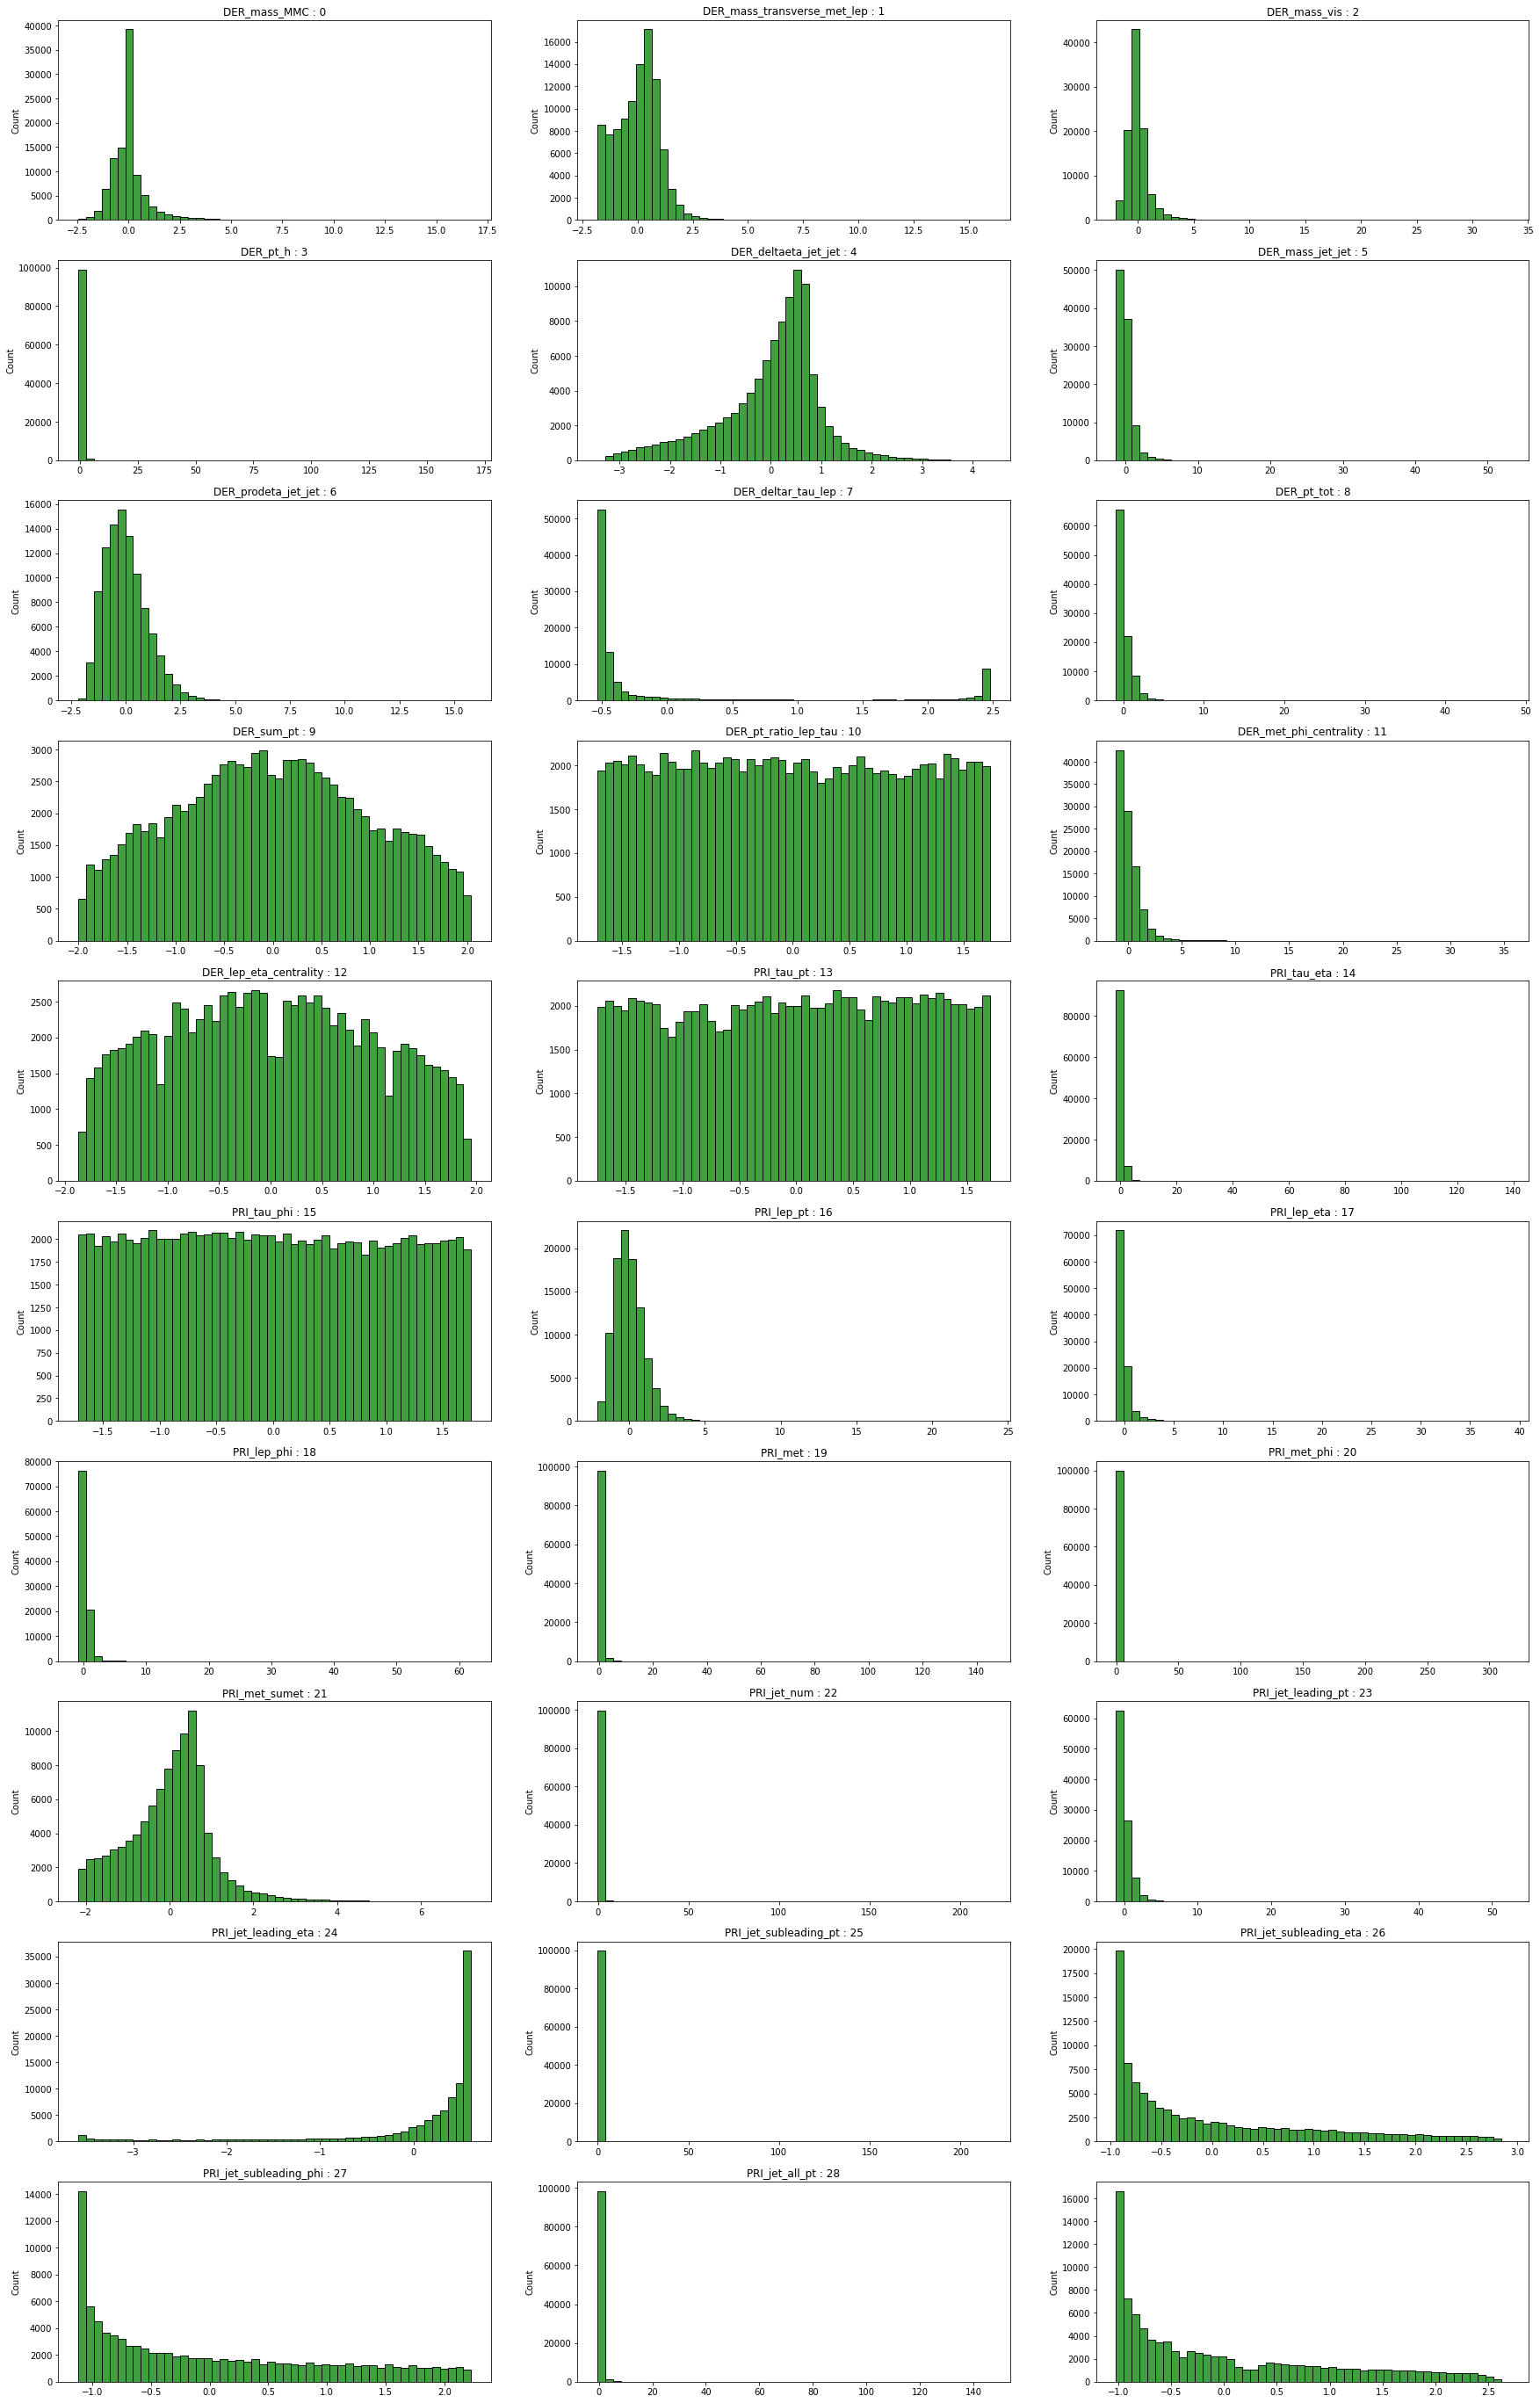

In [426]:
plot_features(x_tr_poly[0], names)

# Train on the whole dataset

In [423]:
x_tr_poly[0][:,0]

array([ 0.56918265,  1.28541723, -0.28940688, ..., -0.13674284,
       -0.52792763, -0.13674284])

In [409]:

# Define the parameters of the algorithm.
lambda_tab = [10**(-2), 0, 10**(-4), 10**(-8)]

max_iters_tab = [2500, 3500, 2000, 3500]
gamma = 10**(-1) #learing rate

#w_tab=np.zeros((4, x_tr_tr_poly[0].shape[1]))
#losses_tab=np.array((0,4))
w_tab = []

for i in range(x_tr_split.shape[0]) :  
    print("DATA_SET : ", i)
    #w_init = params_history[-1][i]
    w_init = np.full(x_tr_poly[i].shape[1], 0.1)
    w, losses = reg_logistic_regression(y_tr_split[i], x_tr_poly[i], lambda_tab[i], w_init, max_iters_tab[i], gamma)
    w_tab.append(w)
    

DATA_SET :  0
iteration :  0  , loss :  0.942860344445929
iteration :  100  , loss :  0.5714534306640148
iteration :  200  , loss :  0.5635745559104965
iteration :  300  , loss :  0.5601978658627481
iteration :  400  , loss :  0.5584424537506515
iteration :  500  , loss :  0.5574070209084456
iteration :  600  , loss :  0.5567604225393206
iteration :  700  , loss :  0.5563410867320211
iteration :  800  , loss :  0.5560609555854602
iteration :  900  , loss :  0.5558689764621783
iteration :  1000  , loss :  0.5557344473623992
iteration :  1100  , loss :  0.5556383561624997
iteration :  1200  , loss :  0.5555686004484628
iteration :  1300  , loss :  0.5555172722732926
iteration :  1400  , loss :  0.5554790772929786
iteration :  1500  , loss :  0.5554503912147717
iteration :  1600  , loss :  0.5554286827406565
iteration :  1700  , loss :  0.5554121522374098
iteration :  1800  , loss :  0.5553995002686224
iteration :  1900  , loss :  0.5553897760079709
iteration :  2000  , loss :  0.55538227

# Cross validation 

In [ ]:
x_tr_0 = x_tr_split[0]


In [ ]:
lambdas = np.logspace(-2, -1, 10)
gamma = 10**(-1)

#rename variable 
x_tr_0 = x_tr_split[0]
y_tr_0 = y_tr_split[0]

x_te_0 = x_te_split[0]
y_te_0 = y_te_split[0]

#preprocessing 
x_tr_0 = build_poly(x_tr_0,4)
x_tr_0 = standardize(x_tr_0)

x_te_0 = build_poly(x_te_0,4)
x_te_0 = standardize(x_te_0)

initial_w = np.full(x_tr_0.shape[1], 0.1)


best_lambda, best_loss =cross_validation_lambdas_with_set(y_tr_0, x_tr_0,y_te_0, x_te_0,lambdas, gamma)

In [ ]:

print(x_te_0.shape)
loss_tr = compute_loss(y_tr_0, x_tr_0, w, "negative_log_likelihood")
loss_te = compute_loss(y_te_0, x_te_0, w, "negative_log_likelihood")
print(loss_tr)

# Cross validation for each degree of jet 0 

In [ ]:
x_pp = build_poly(x_tr_0, 3)

In [ ]:
x_tr_0 = x_tr_split[0]
y_tr_0 = y_tr_split[0]

lambdas = np.logspace(-10, 0, 5)
gamma = 10**(-1)
degrees = np.arange(5,10)
k_fold = 3

cross_validation_degree_ (y_tr_0, x_tr_0, degrees, k_fold, lambdas, gamma)

# Correlation matrix 

Let's study the relation in between the features of our dataset in order to remove redundant features. 
First let's concatenate x_tr and x_te to obtain a full dataset.
We will then remove redundant features.

In [ ]:
x_tr_filled = standardize_fill_nan(x_tr_reg)
x_te_filled = standardize_fill_nan(x_te_reg)

In [ ]:
#X = np.concatenate((x_tr_filled,x_te_filled))
#R = np.corrcoef(x_tr_filled) 
# me fait planter le noyau : si t'y arrives fait je suis chaud 


# Cross validation 

In [ ]:
x_tr_filled = standardize_fill_nan(x_tr_reg)
print(x_tr_filled.shape)

In [ ]:
k_fold = 10 
lambdas = np.logspace(-4, 0, 10)
gamma = 10**(-3)

best_lambda, best_loss = cross_validation_lambdas(y_tr, x_tr_filled,  k_fold, lambdas, gamma)

In [ ]:
degrees = np.arange(10)
degrees.shape[0]

In [ ]:
lambdas = np.logspace(-10, -1, 10)
gamma = 10**(-3)
cross_validation_lambdas_with_set(y_tr, x_tr_filled,y_te, x_te_filled,lambdas, gamma)

## Let's find best lambda for each degree

In [ ]:
degrees= np.arange(2,9)
lambdas = np.logspace(-10, -1, 10)
gamma = 10**(-3)

loss_tr_deg, loss_te_deg, best_lambda_deg, best_loss_deg = cross_val_find_lambda_degree(y_tr, x_tr_filled,y_te, x_te_filled,lambdas, gamma, degrees)

In [ ]:
plot_cross_validation_degree(lambdas, loss_tr_deg, loss_te_deg, degrees)

# Find right gamma

In [ ]:
lambda_ = 10**(-7)
max_iters = 1000
fonction_to_optimize = 'reg_logistic_regression'
start_gamma = 10**(-3)
end_gamma = 1
number = 4
initial_w = np.full(x_tr_filled.shape[1], 0.1)
gamma_tab, losses_tab = search_gamma(y_tr, x_tr_filled, lambda_, initial_w, max_iters, fonction_to_optimize, start_gamma, end_gamma, number)

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(gamma_tab, losses_tab)
plt.xlabel('losses')
plt.ylabel('gamma')
plt.legend(['Gamma values'], fontsize=13)

# TRAIN   reg_logistic_regression

# Split the Data in 4 parts

In [ ]:
#split the data according to PRI_jet_num
x_tr_split = np.array([x_tr_filled[np.where(x_tr_class==0)], x_tr_filled[np.where(x_tr_class==1)], 
                       x_tr_filled[np.where(x_tr_class==2)], x_tr_filled[np.where(x_tr_class==3)]], dtype=object)

y_tr_split = np.array([y_tr[np.where(x_tr_class==0)], y_tr[np.where(x_tr_class==1)], 
                       y_tr[np.where(x_tr_class==2)], y_tr[np.where(x_tr_class==3)]], dtype=object)

In [ ]:
w_tab[0].shape

In [ ]:
# from gradient_descent import *

from datetime import datetime

# Define the parameters of the algorithm.
lambda_ = 10**(-8)
#initial_w = np.full(x_tr_filled.shape[1], 0.1)
#w = np.array([0.004, -0.018, -0.0005, 0.12, 0.08, 0.2, 0.07, 0.08, 0.05, -0.04, 0.3, 0.3, 0.3, 0.2, 0.3, 0.3, 0.15, 0.3, 0.3, 0.1, 0.3, -0.2, 0.1, 0.3, 0.1,  0.3, 0.1, 0.3, 0.1])
#w = params_history[-1][0]
w = np.full(x_tr_filled.shape[1], 10**(-7))
max_iters = 1000
gamma = 10**(-1) #learing rate

w_tab=np.zeros((4, x_tr_filled.shape[1]))
#losses_tab=np.array((0,4))


for i in range(x_tr_split.shape[0]) :  
    print("DATA_SET : ", i)
    w_init = params_history[-1][i]
    w, losses = reg_logistic_regression(y_tr_split[i], x_tr_split[i], lambda_, w_init, max_iters, gamma)
    w_tab[i] = w
    #np.append[losses_tab, losses]
    
#w, losses = reg_logistic_regression(y_tr, x_tr_filled, lambda_, w, max_iters, gamma)


# Print result
#print(losses, w)


In [ ]:
params_history = []
params_history.append(w_tab)
params_history[-1][0].shape

w_tab[0].shape
len(w)

In [ ]:
print(w_tab)

In [ ]:
x_te_filled[5]@w_tab[0]

# TEST

In [ ]:
lambda_tab.append(lambda_)
degree_tab.append(degree)
w_tab.append(ws)

In [410]:
x_te_id = x_te[:, 22]
ind_0 = np.where(x_te_id==0)[0]
ind_1 = np.where(x_te_id==1)[0]
ind_2 = np.where(x_te_id==2)[0]
ind_3 = np.where(x_te_id==3)[0]

In [411]:
degree = 5
x_te_std_0 = standardize(build_poly(x_te_del[0], degree))
x_te_std_1 = standardize(build_poly(x_te_del[1], degree))
x_te_std_2 = standardize(build_poly(x_te_del[2], degree))
x_te_std_3 = standardize(build_poly(x_te_del[3], degree))

In [418]:
print(len(ind_3))

50794


In [412]:

proba=np.zeros(x_te.shape[0])
y_hat=[]

proba[ind_0] = x_te_std_0@w_tab[0]
proba[ind_1] = x_te_std_1@w_tab[1]
proba[ind_2] = x_te_std_2@w_tab[2]
proba[ind_3] = x_te_std_3@w_tab[3]

for i in proba:
    if i>0:
        y_hat.append(1)
    else :
        y_hat.append(-1)


We fix the initial values of the parameters, based on running the algorithm several times and noting down the final parameter values. It gives us a better starting point and helps to achieve a better performance in a limited number of iterations.

# Create csv for submission

In [413]:
from helpers import *

create_csv_submission(ids_te, y_hat, 'submissionfinal')